In [1]:
import urllib.request
import numpy as np
import cv2
from matplotlib import pyplot as plt
%matplotlib inline
import pywt

In [2]:
def show(img):
    plt.figure(figsize = (30,30))
    plt.imshow(img, cmap="gray")

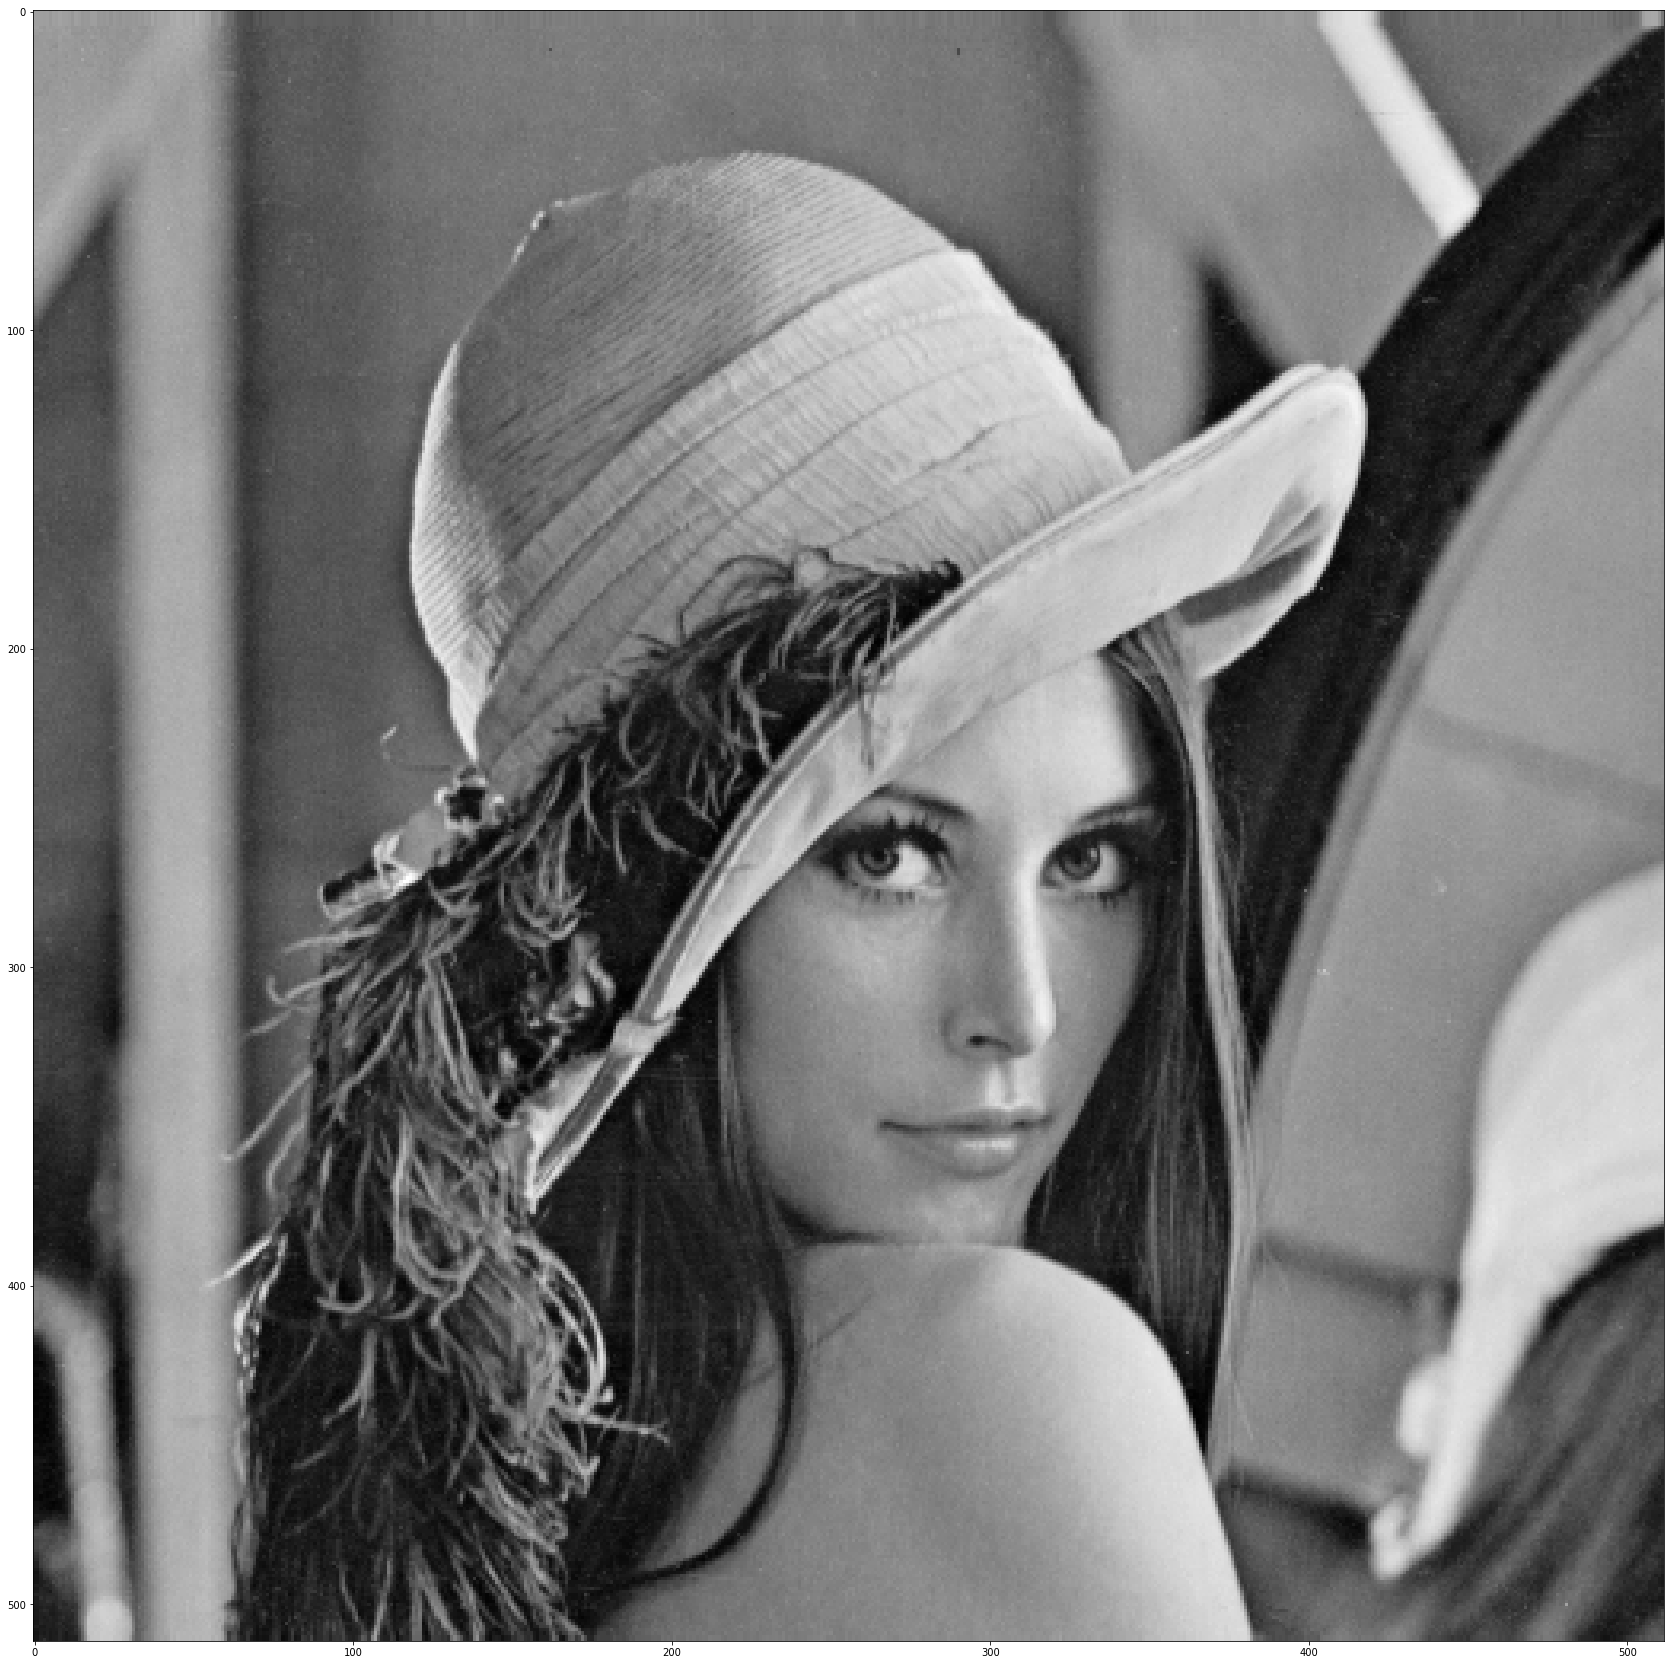

In [3]:
HTTP_response = urllib.request.urlopen('http://www.hpca.ual.es/~vruiz/images/lena.png')
arr = np.asarray(bytearray(HTTP_response.read()), dtype=np.uint8)
BGR = cv2.imdecode(arr,-1)
Y = cv2.cvtColor(BGR, cv2.COLOR_BGR2YCrCb)[:,:,0]
Y = Y.astype(np.float32)
show(Y)

In [4]:
# Wavelet machinery

import pywt

# Sólo por ver los distintos filtros que hay disponibles
print (pywt.wavelist())

# Seleccionamos una en concreto 
#wavelet = 'db9' # http://wavelets.pybytes.com/wavelet/db9/
#wavelet = 'haar'
#wavelet='rbio3.5'
#wavelet='rbio1.1'
wavelet='bior3.5'
mode='per'

['bior1.1', 'bior1.3', 'bior1.5', 'bior2.2', 'bior2.4', 'bior2.6', 'bior2.8', 'bior3.1', 'bior3.3', 'bior3.5', 'bior3.7', 'bior3.9', 'bior4.4', 'bior5.5', 'bior6.8', 'cgau1', 'cgau2', 'cgau3', 'cgau4', 'cgau5', 'cgau6', 'cgau7', 'cgau8', 'cmor', 'coif1', 'coif2', 'coif3', 'coif4', 'coif5', 'coif6', 'coif7', 'coif8', 'coif9', 'coif10', 'coif11', 'coif12', 'coif13', 'coif14', 'coif15', 'coif16', 'coif17', 'db1', 'db2', 'db3', 'db4', 'db5', 'db6', 'db7', 'db8', 'db9', 'db10', 'db11', 'db12', 'db13', 'db14', 'db15', 'db16', 'db17', 'db18', 'db19', 'db20', 'db21', 'db22', 'db23', 'db24', 'db25', 'db26', 'db27', 'db28', 'db29', 'db30', 'db31', 'db32', 'db33', 'db34', 'db35', 'db36', 'db37', 'db38', 'dmey', 'fbsp', 'gaus1', 'gaus2', 'gaus3', 'gaus4', 'gaus5', 'gaus6', 'gaus7', 'gaus8', 'haar', 'mexh', 'morl', 'rbio1.1', 'rbio1.3', 'rbio1.5', 'rbio2.2', 'rbio2.4', 'rbio2.6', 'rbio2.8', 'rbio3.1', 'rbio3.3', 'rbio3.5', 'rbio3.7', 'rbio3.9', 'rbio4.4', 'rbio5.5', 'rbio6.8', 'shan', 'sym2', 'sym3

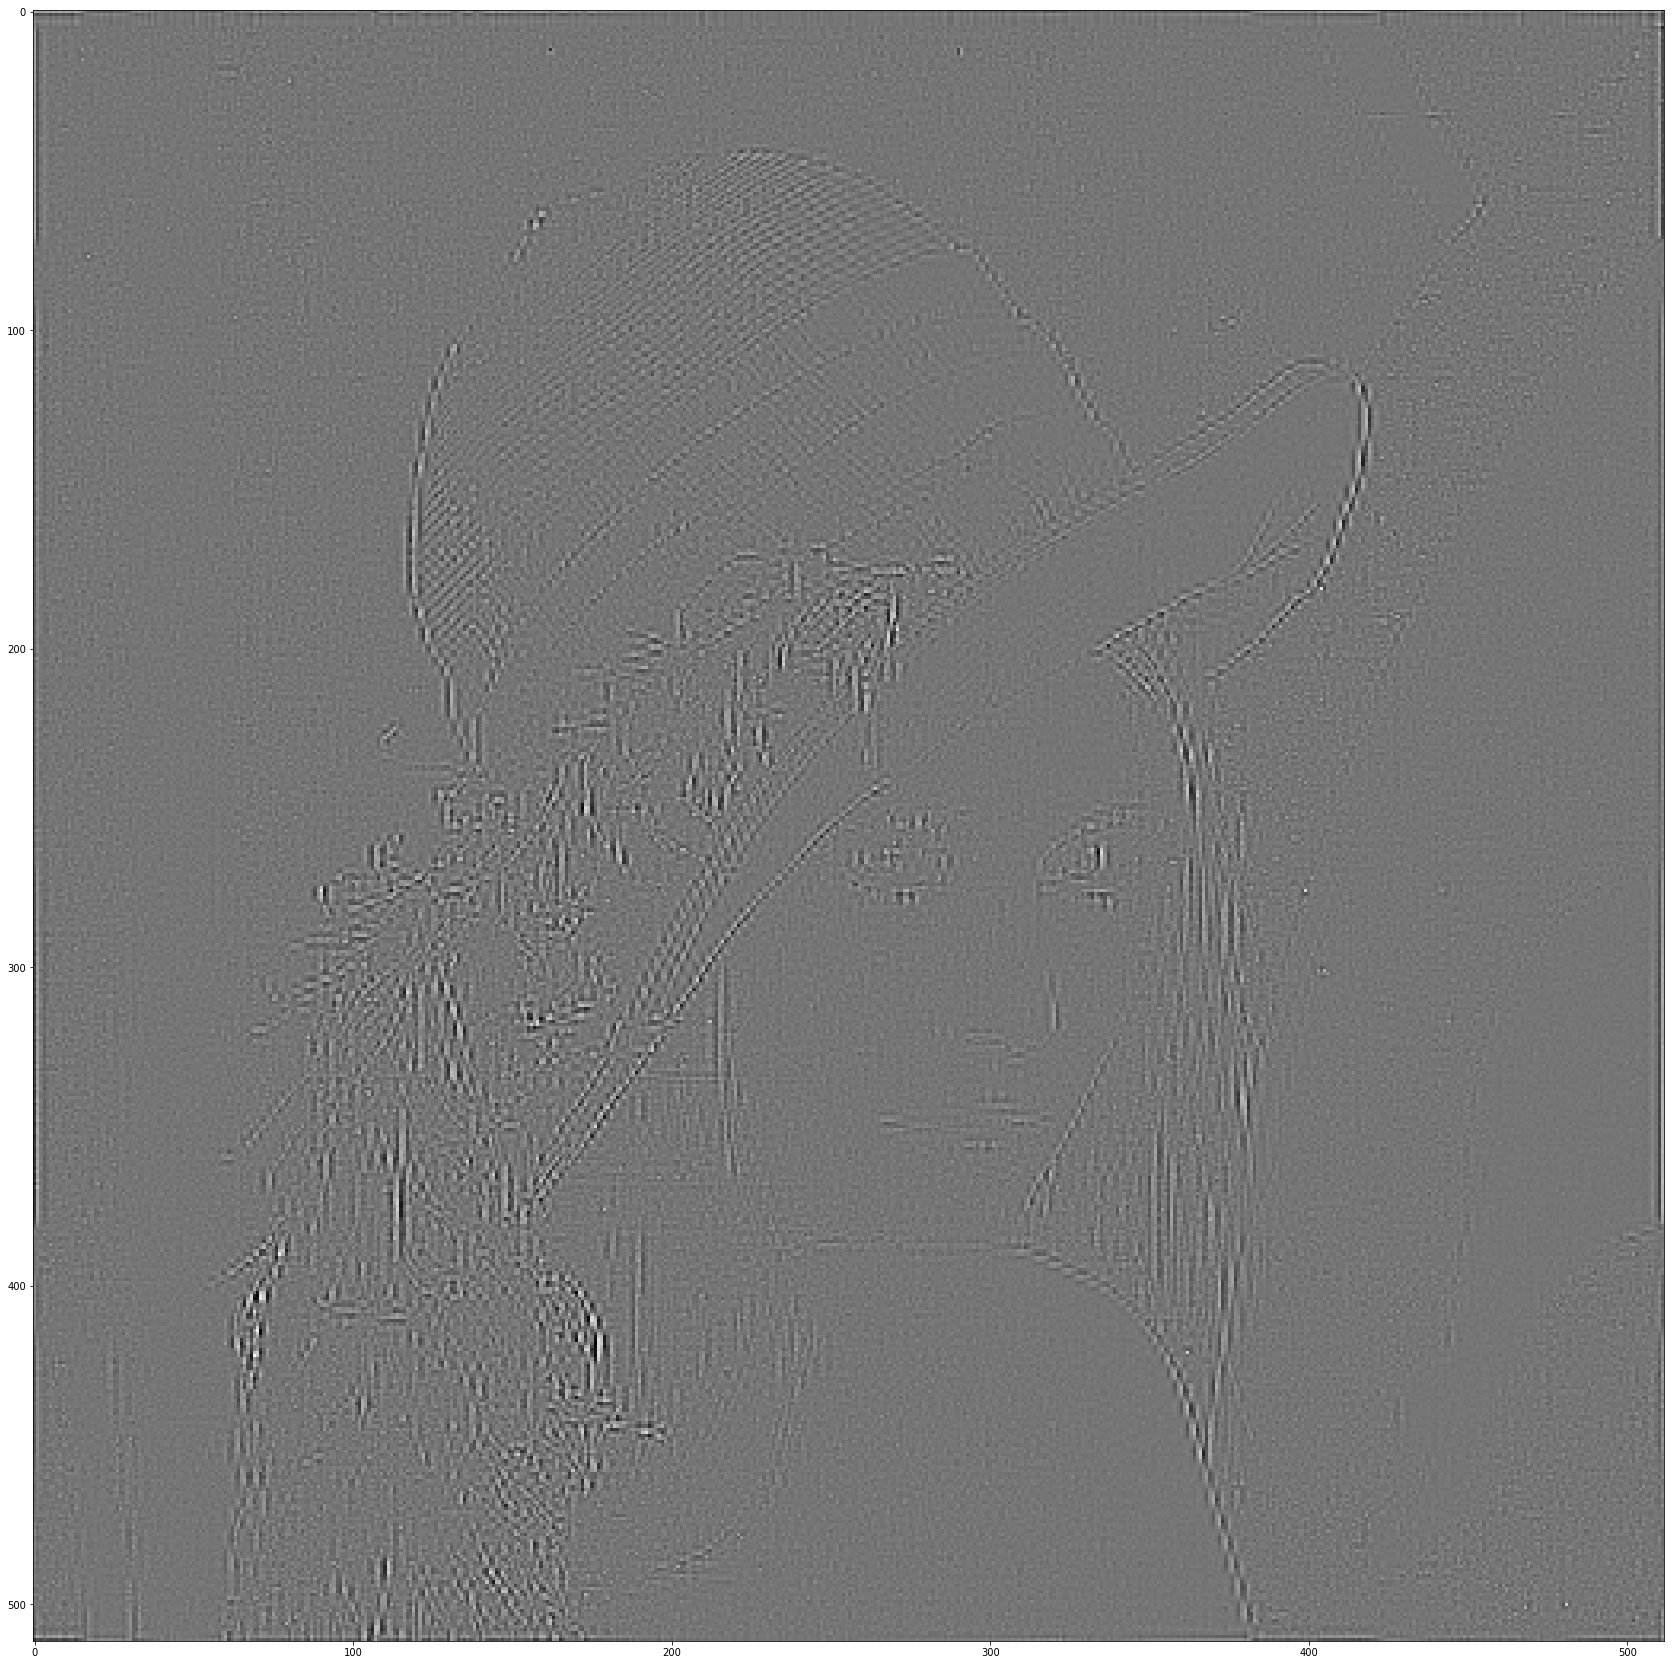

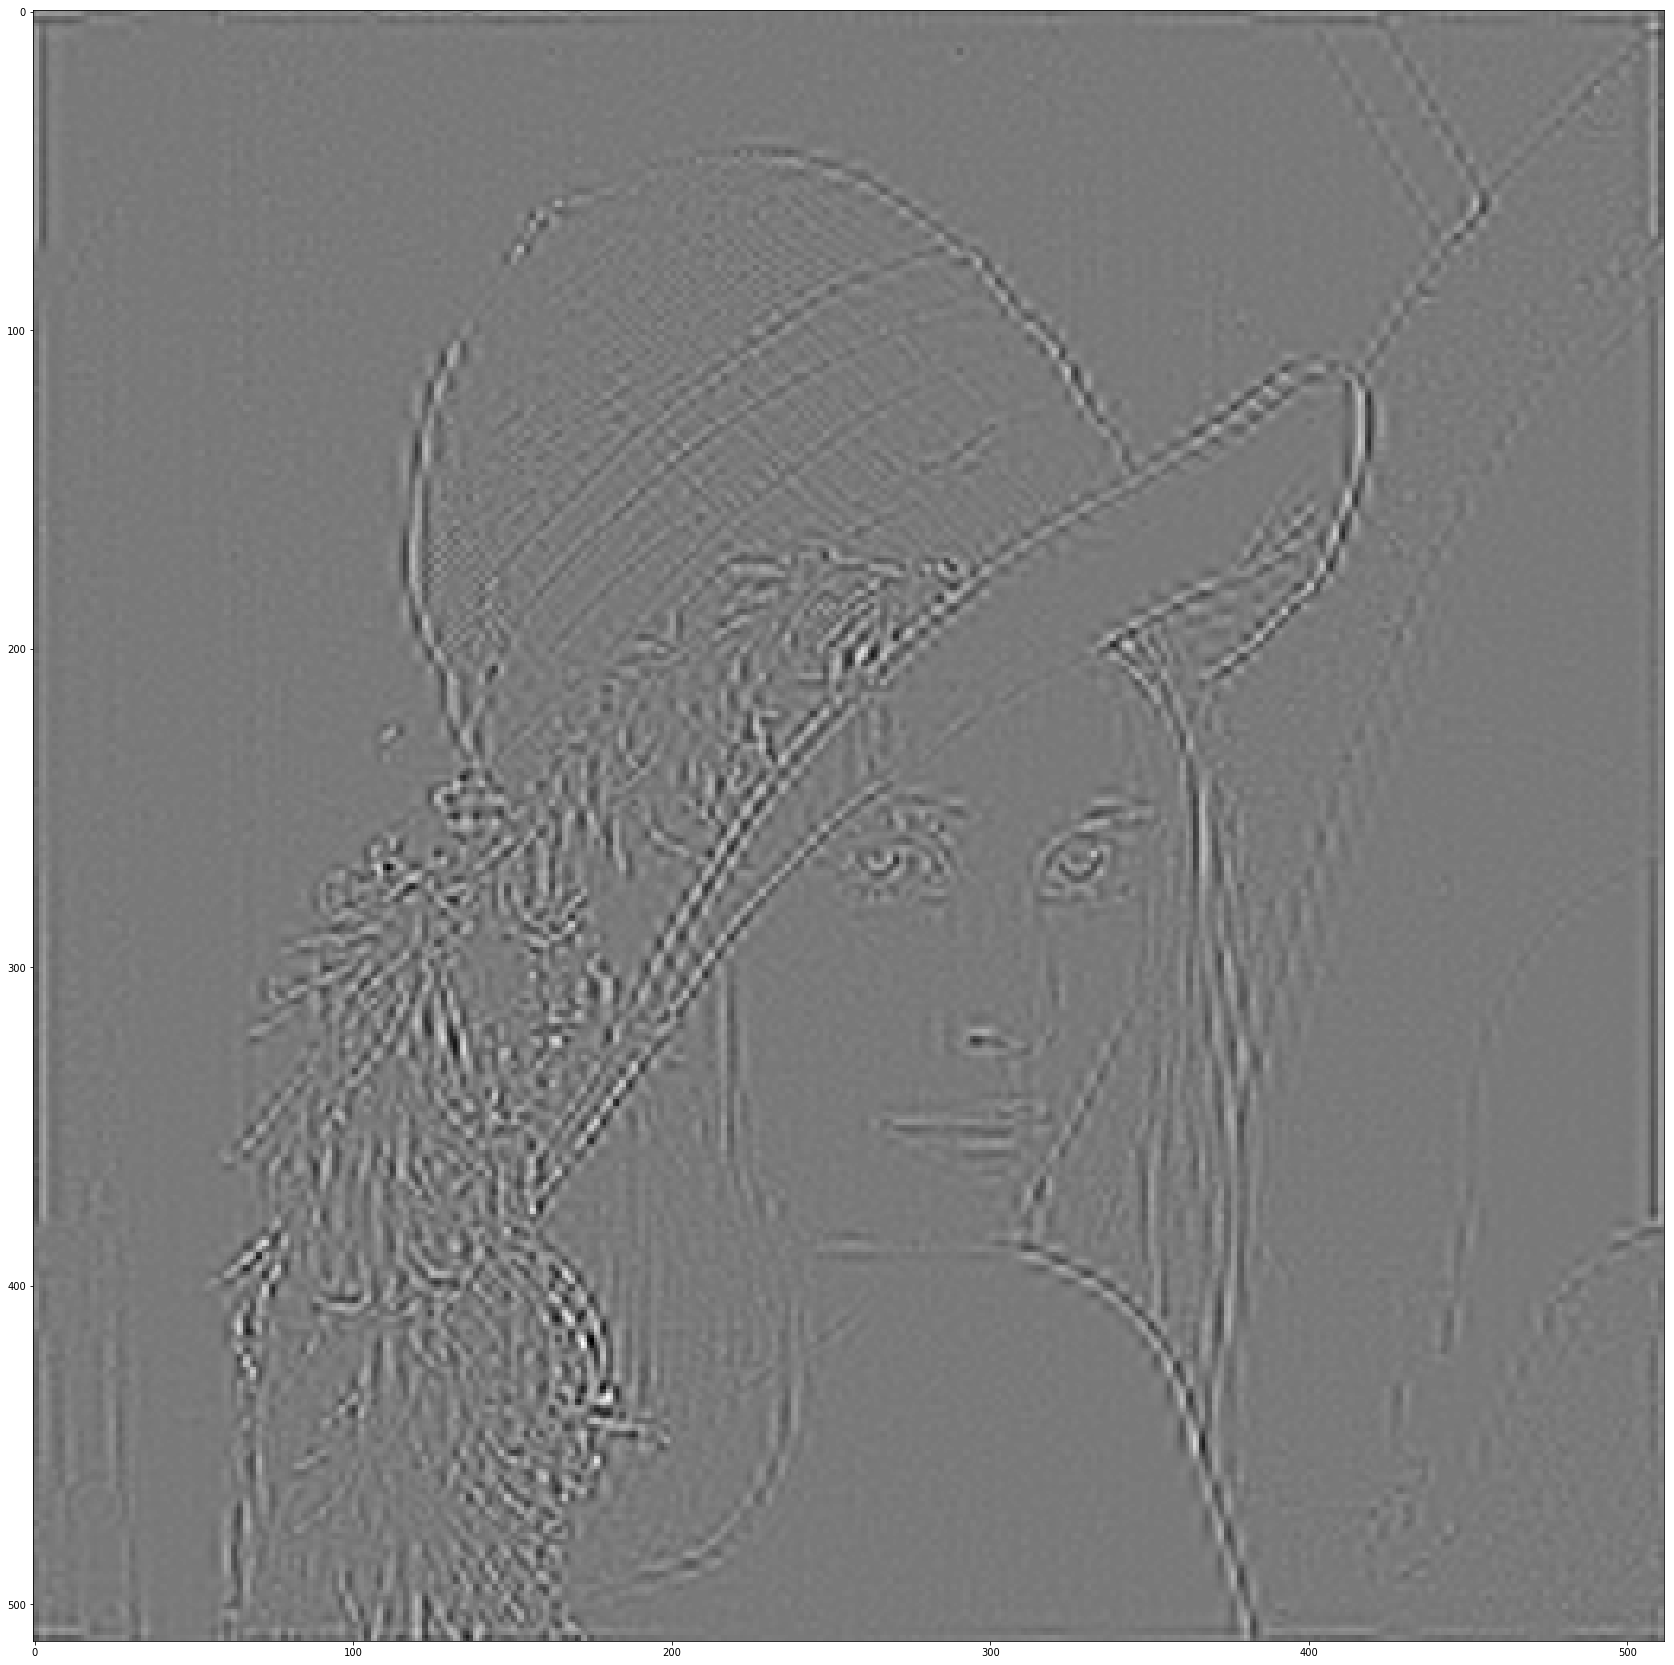

In [9]:
L1, H1 = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros(L1.shape)
_H1_ = pywt.idwt2((zero, H1), wavelet, 'per')
L2, H2 = pywt.dwt2(L1, wavelet, 'per')
zero = np.zeros(L2.shape)
_H2_ = pywt.idwt2((zero, H2), wavelet, 'per')
zero = np.zeros(L1.shape)
i_H2_ = pywt.idwt2((_H2_, (zero, zero, zero)), wavelet, 'per')
show(_H1_)
show(i_H2_)

In [10]:
import cv2
dof = cv2.calcOpticalFlowFarneback(_H1_, i_H2_, None, 0.5, 3, 15, 3, 5, 1.2, 0)

In [11]:
def estimate_frame(base, flow):
    height, width = flow.shape[:2]
    map_x = np.tile(np.arange(width), (height, 1))
    map_y = np.swapaxes(np.tile(np.arange(height), (width, 1)), 0, 1)
    map_xy = (flow + np.dstack((map_x, map_y))).astype('float32')

    return cv2.remap(base, map_xy, None, 
            interpolation=cv2.INTER_LINEAR,
            borderMode=cv2.BORDER_REPLICATE)

In [12]:
estimation = estimate_frame(i_H2_, dof)

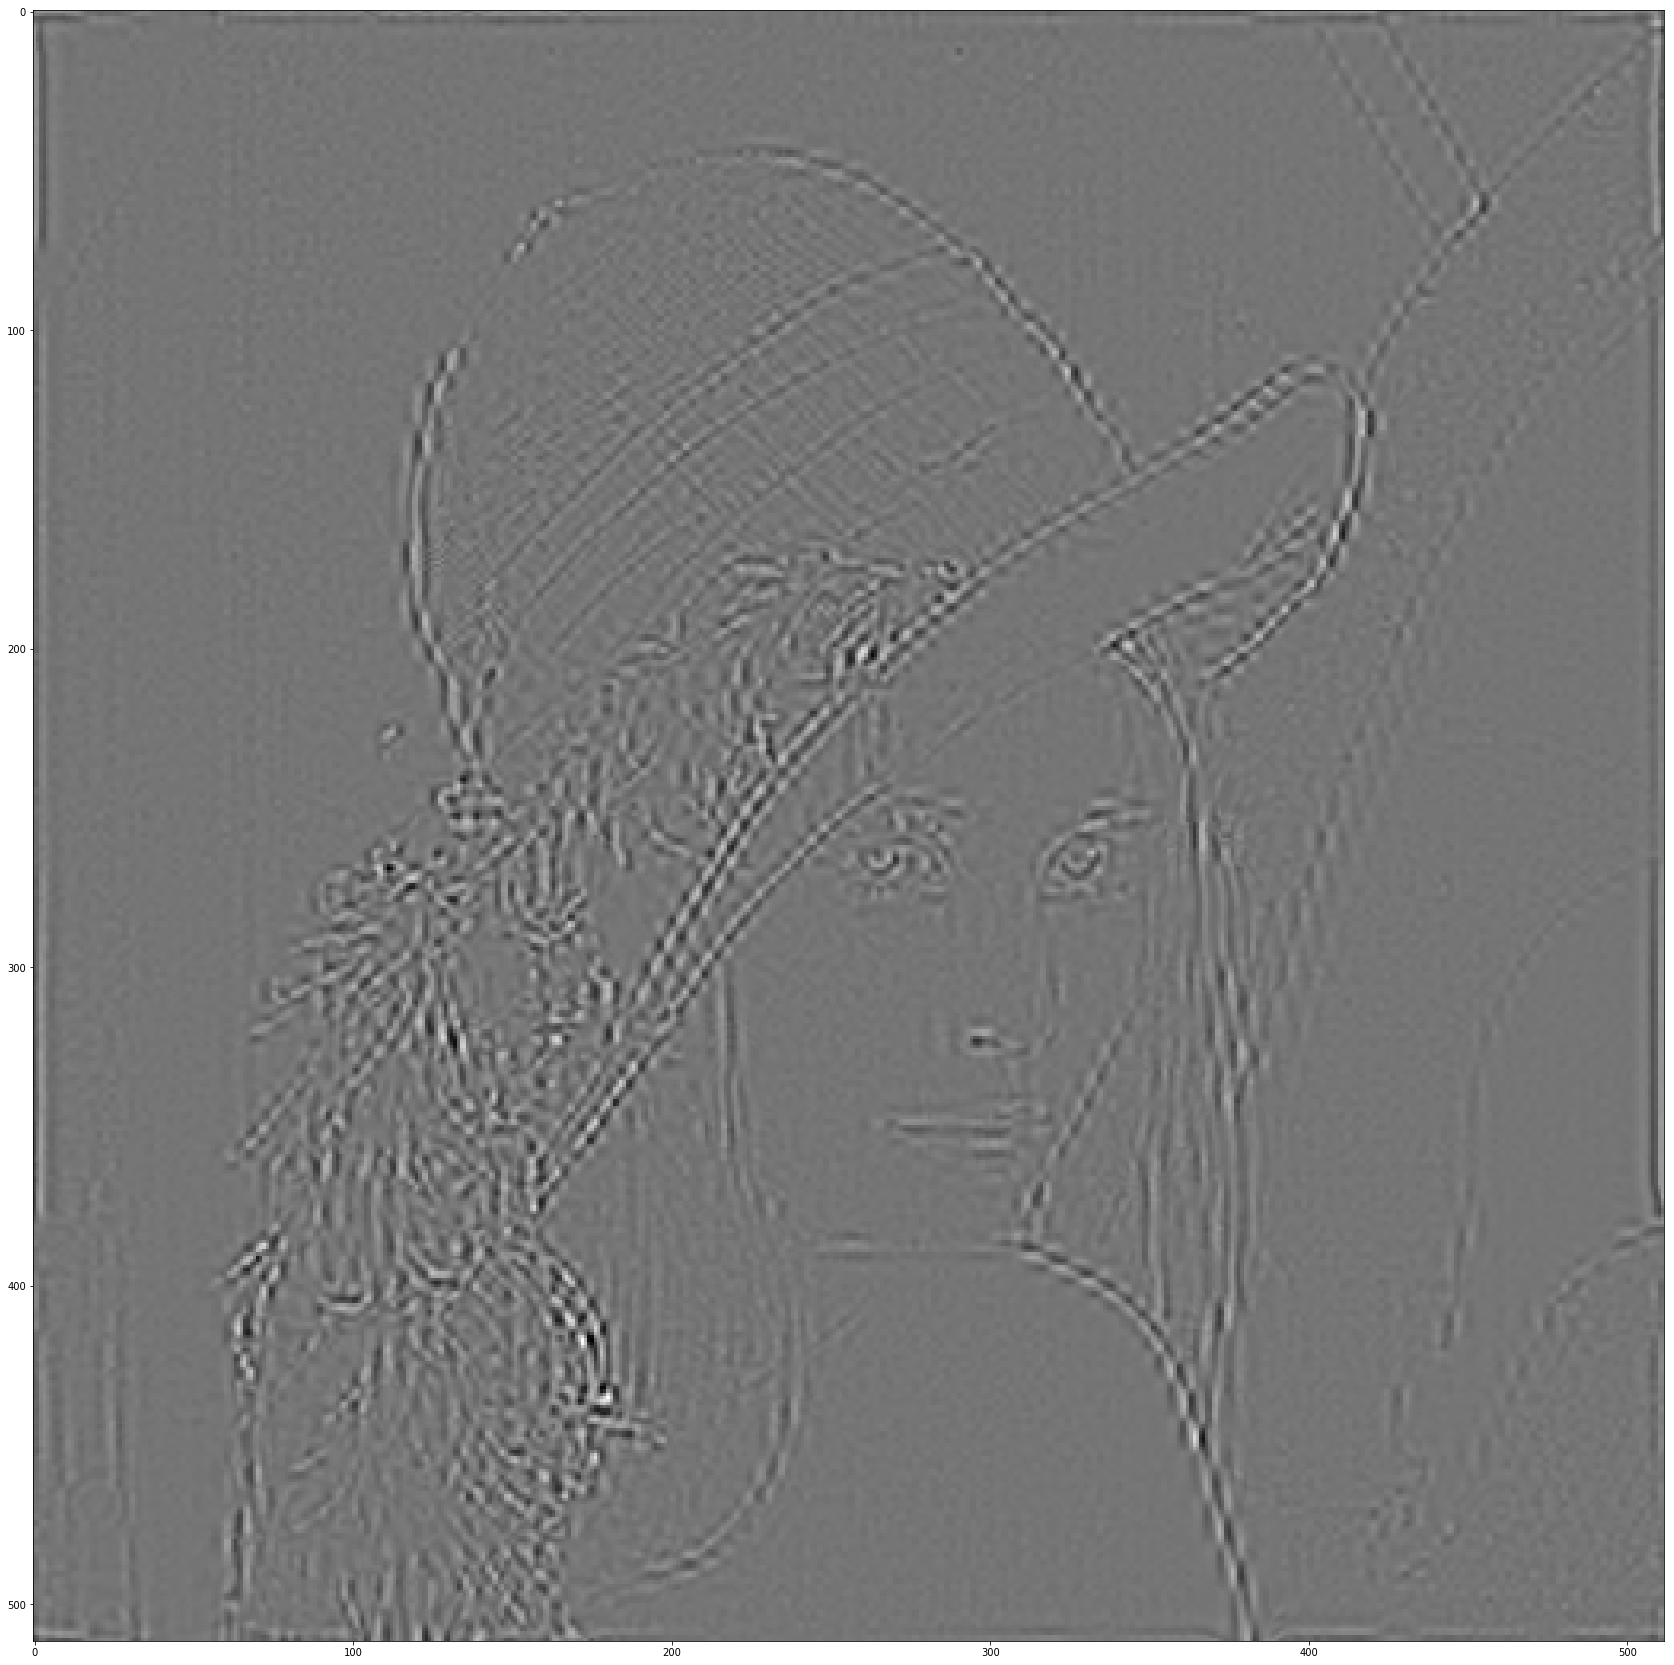

In [13]:
show(estimation)

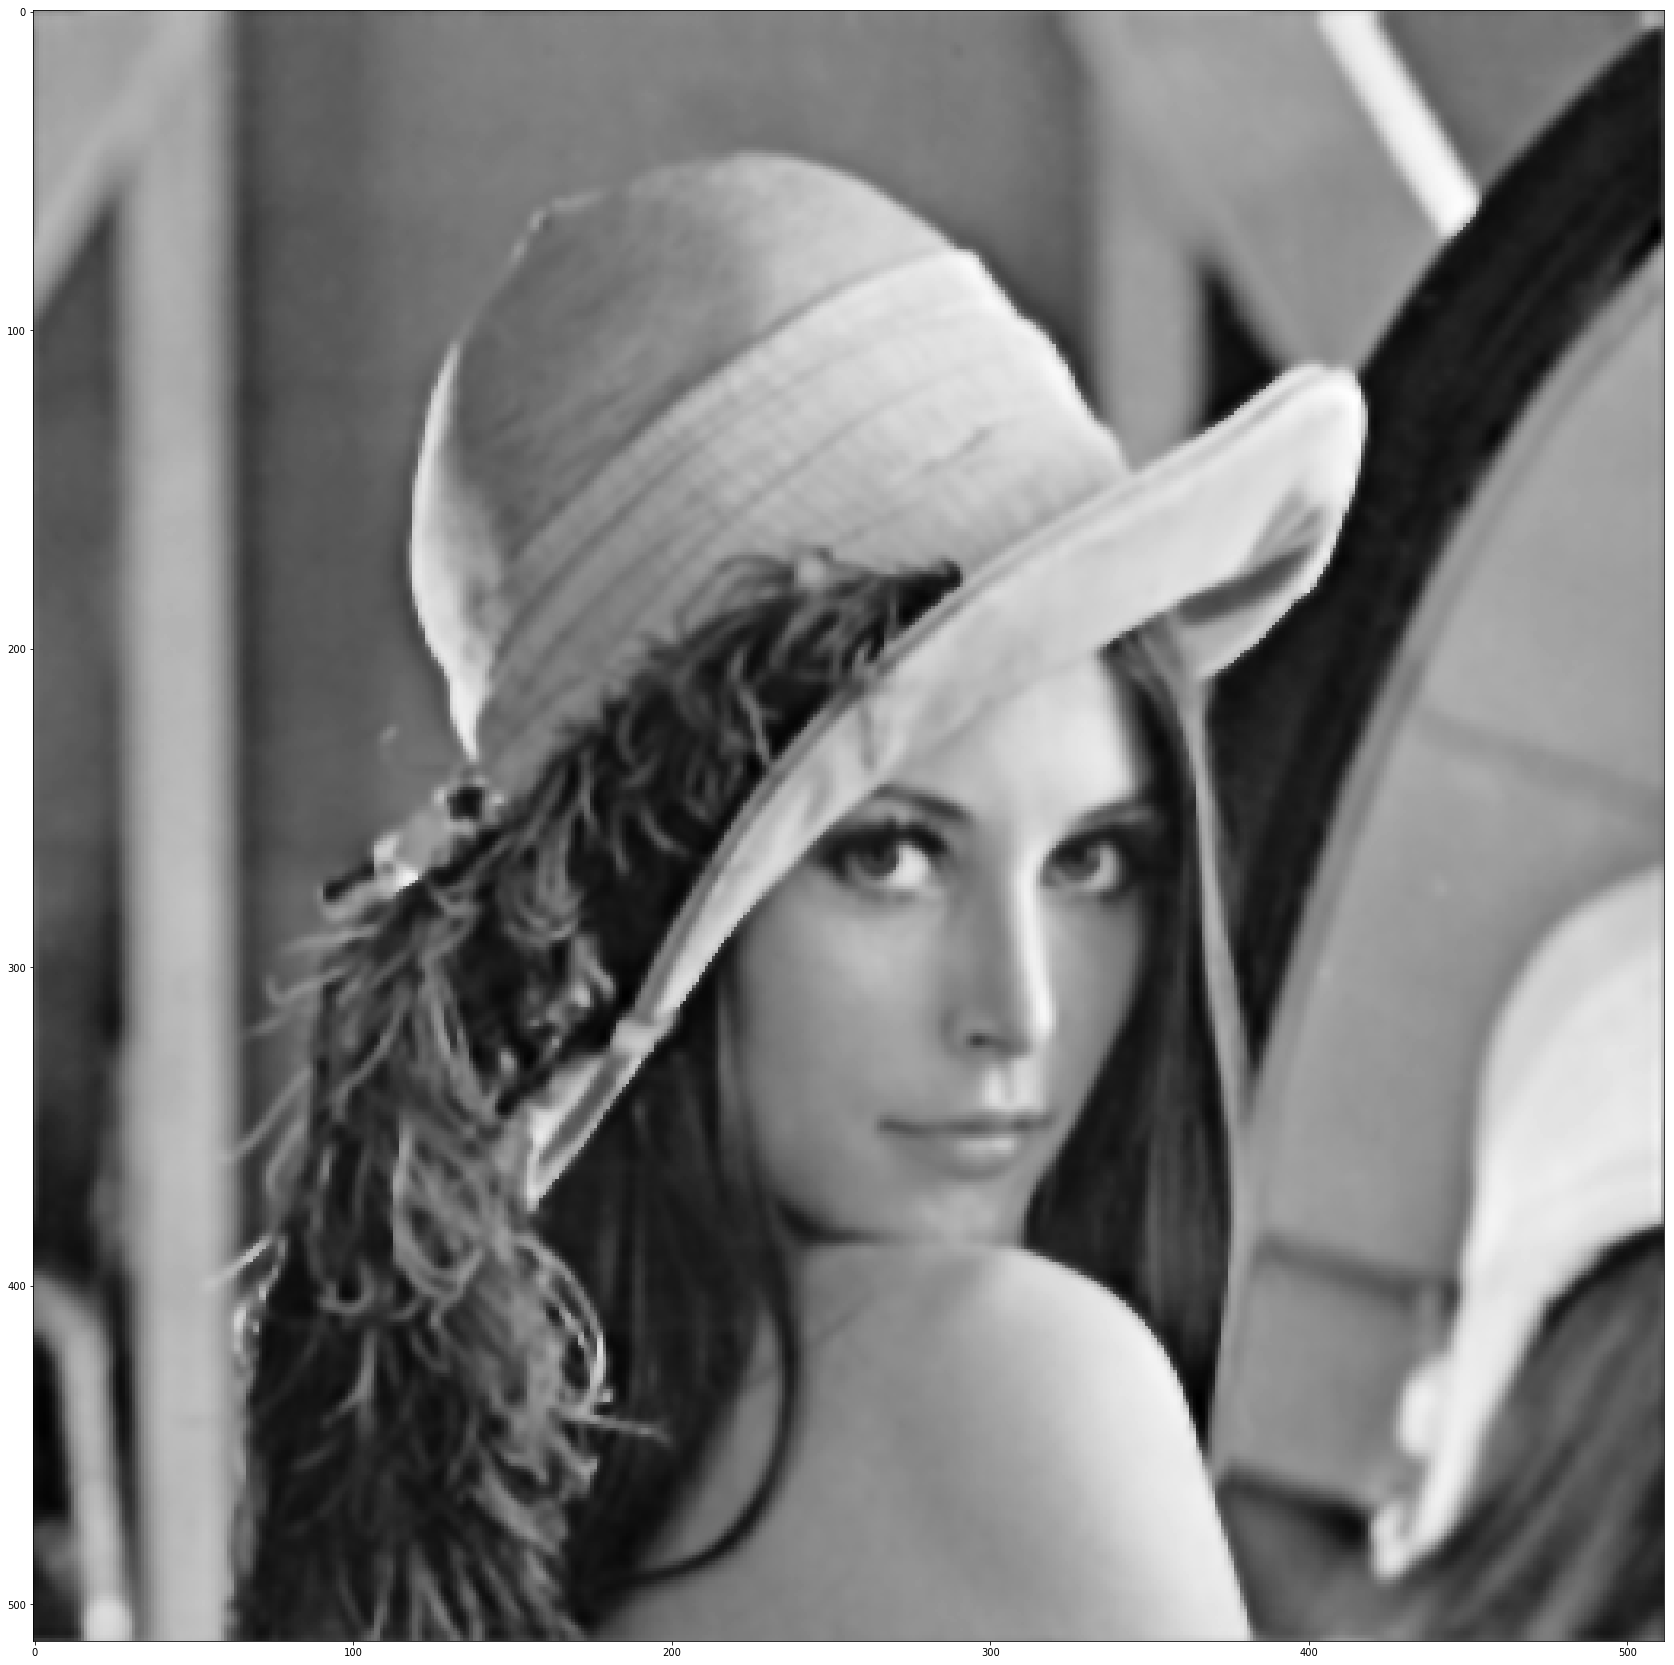

In [10]:
from medpy.filter.smoothing import anisotropic_diffusion
L_big_filtered = anisotropic_diffusion(L_big, niter=10)
show(L_big_filtered)

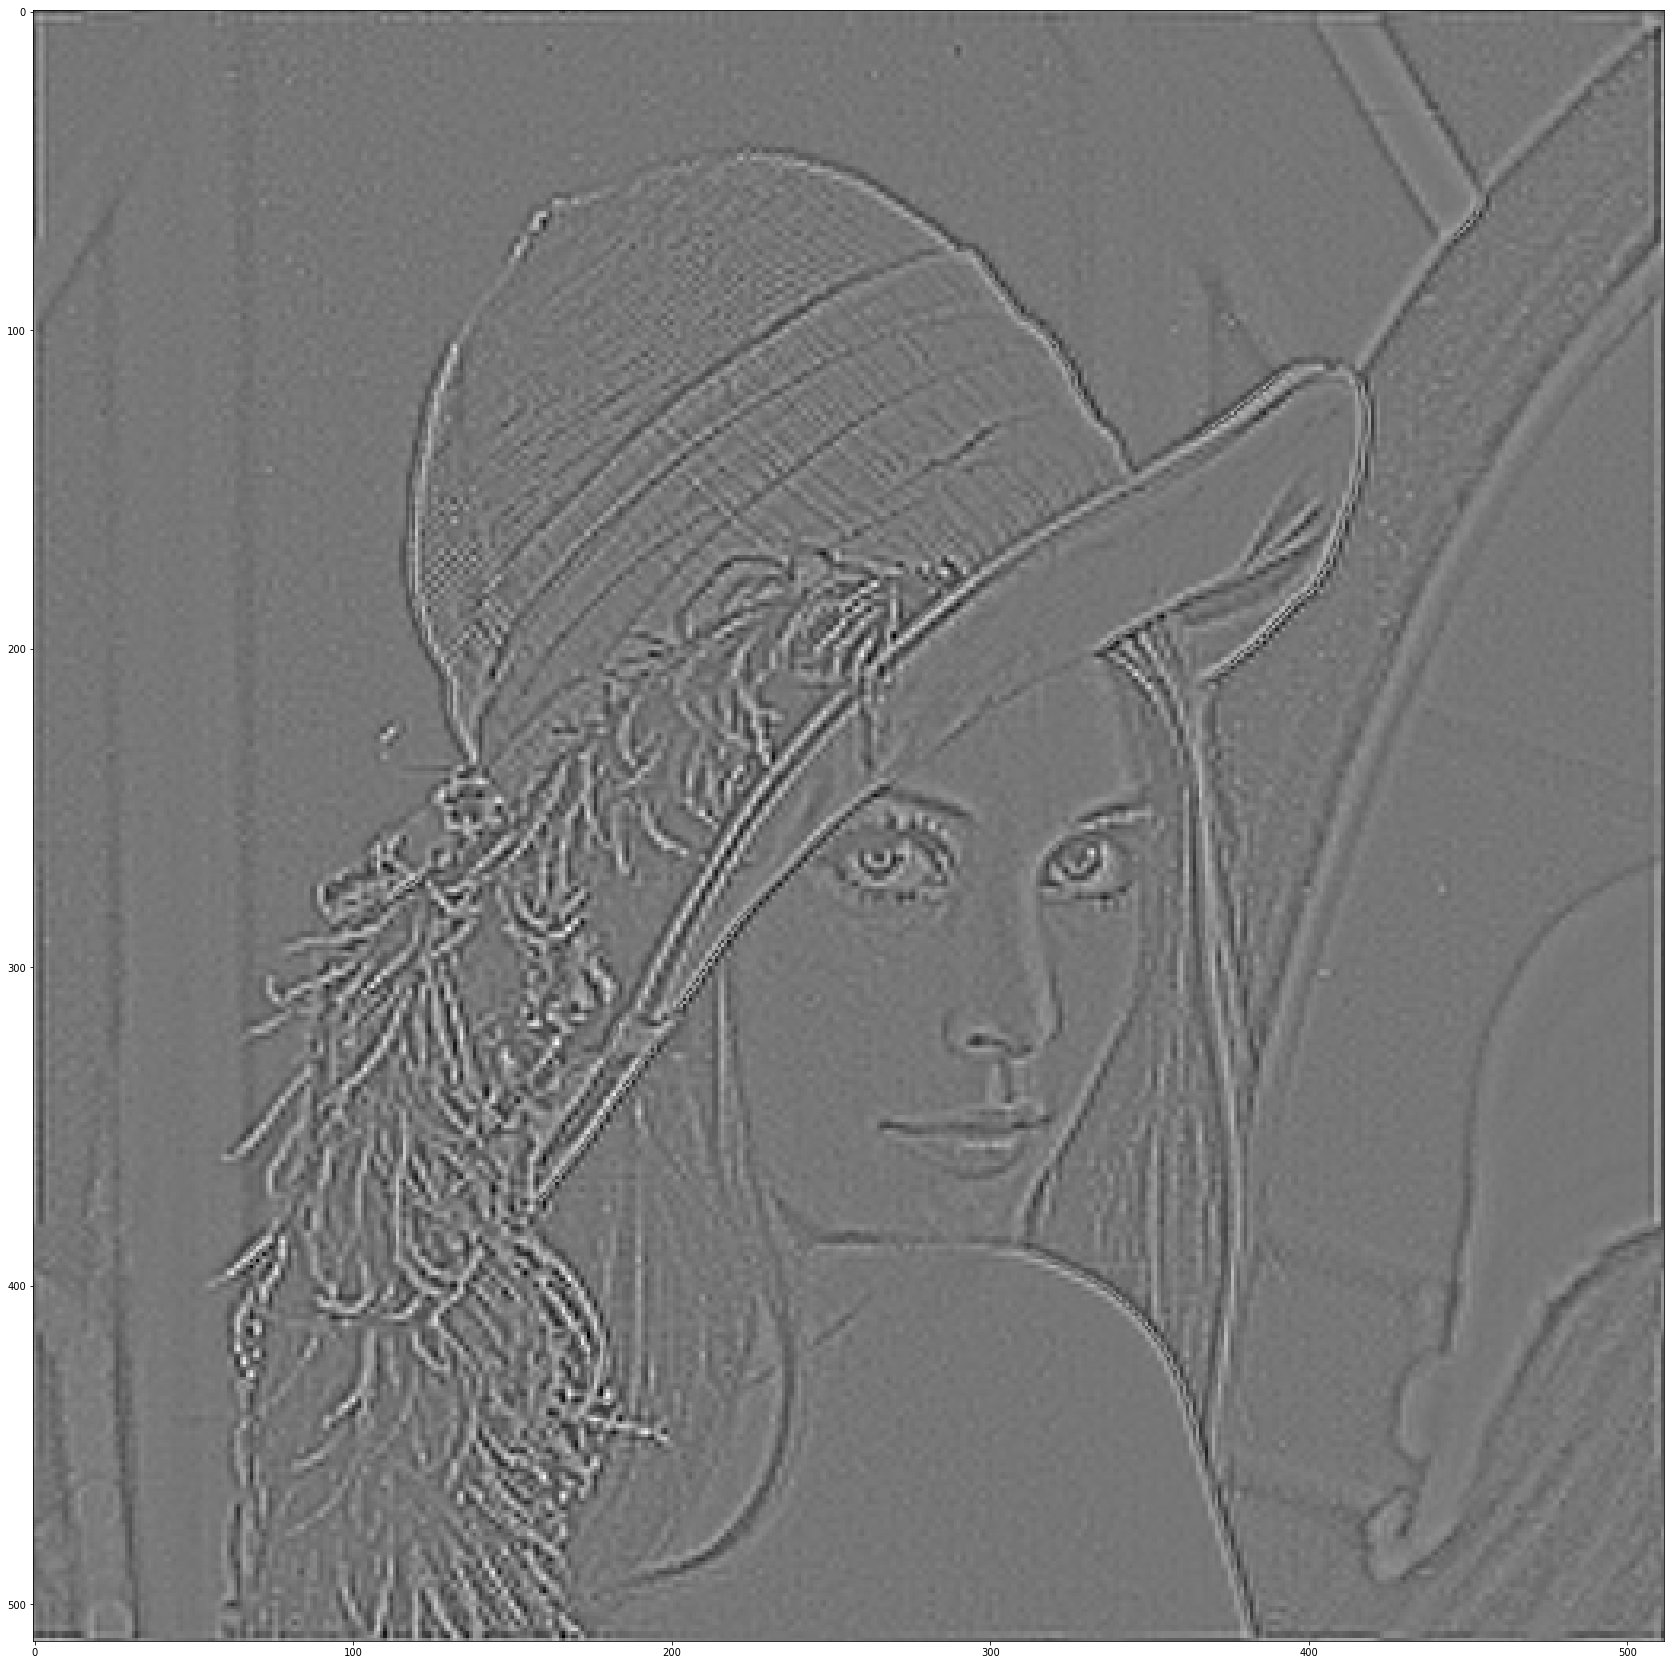

In [11]:
diff = L_big - L_big_filtered
show(diff)

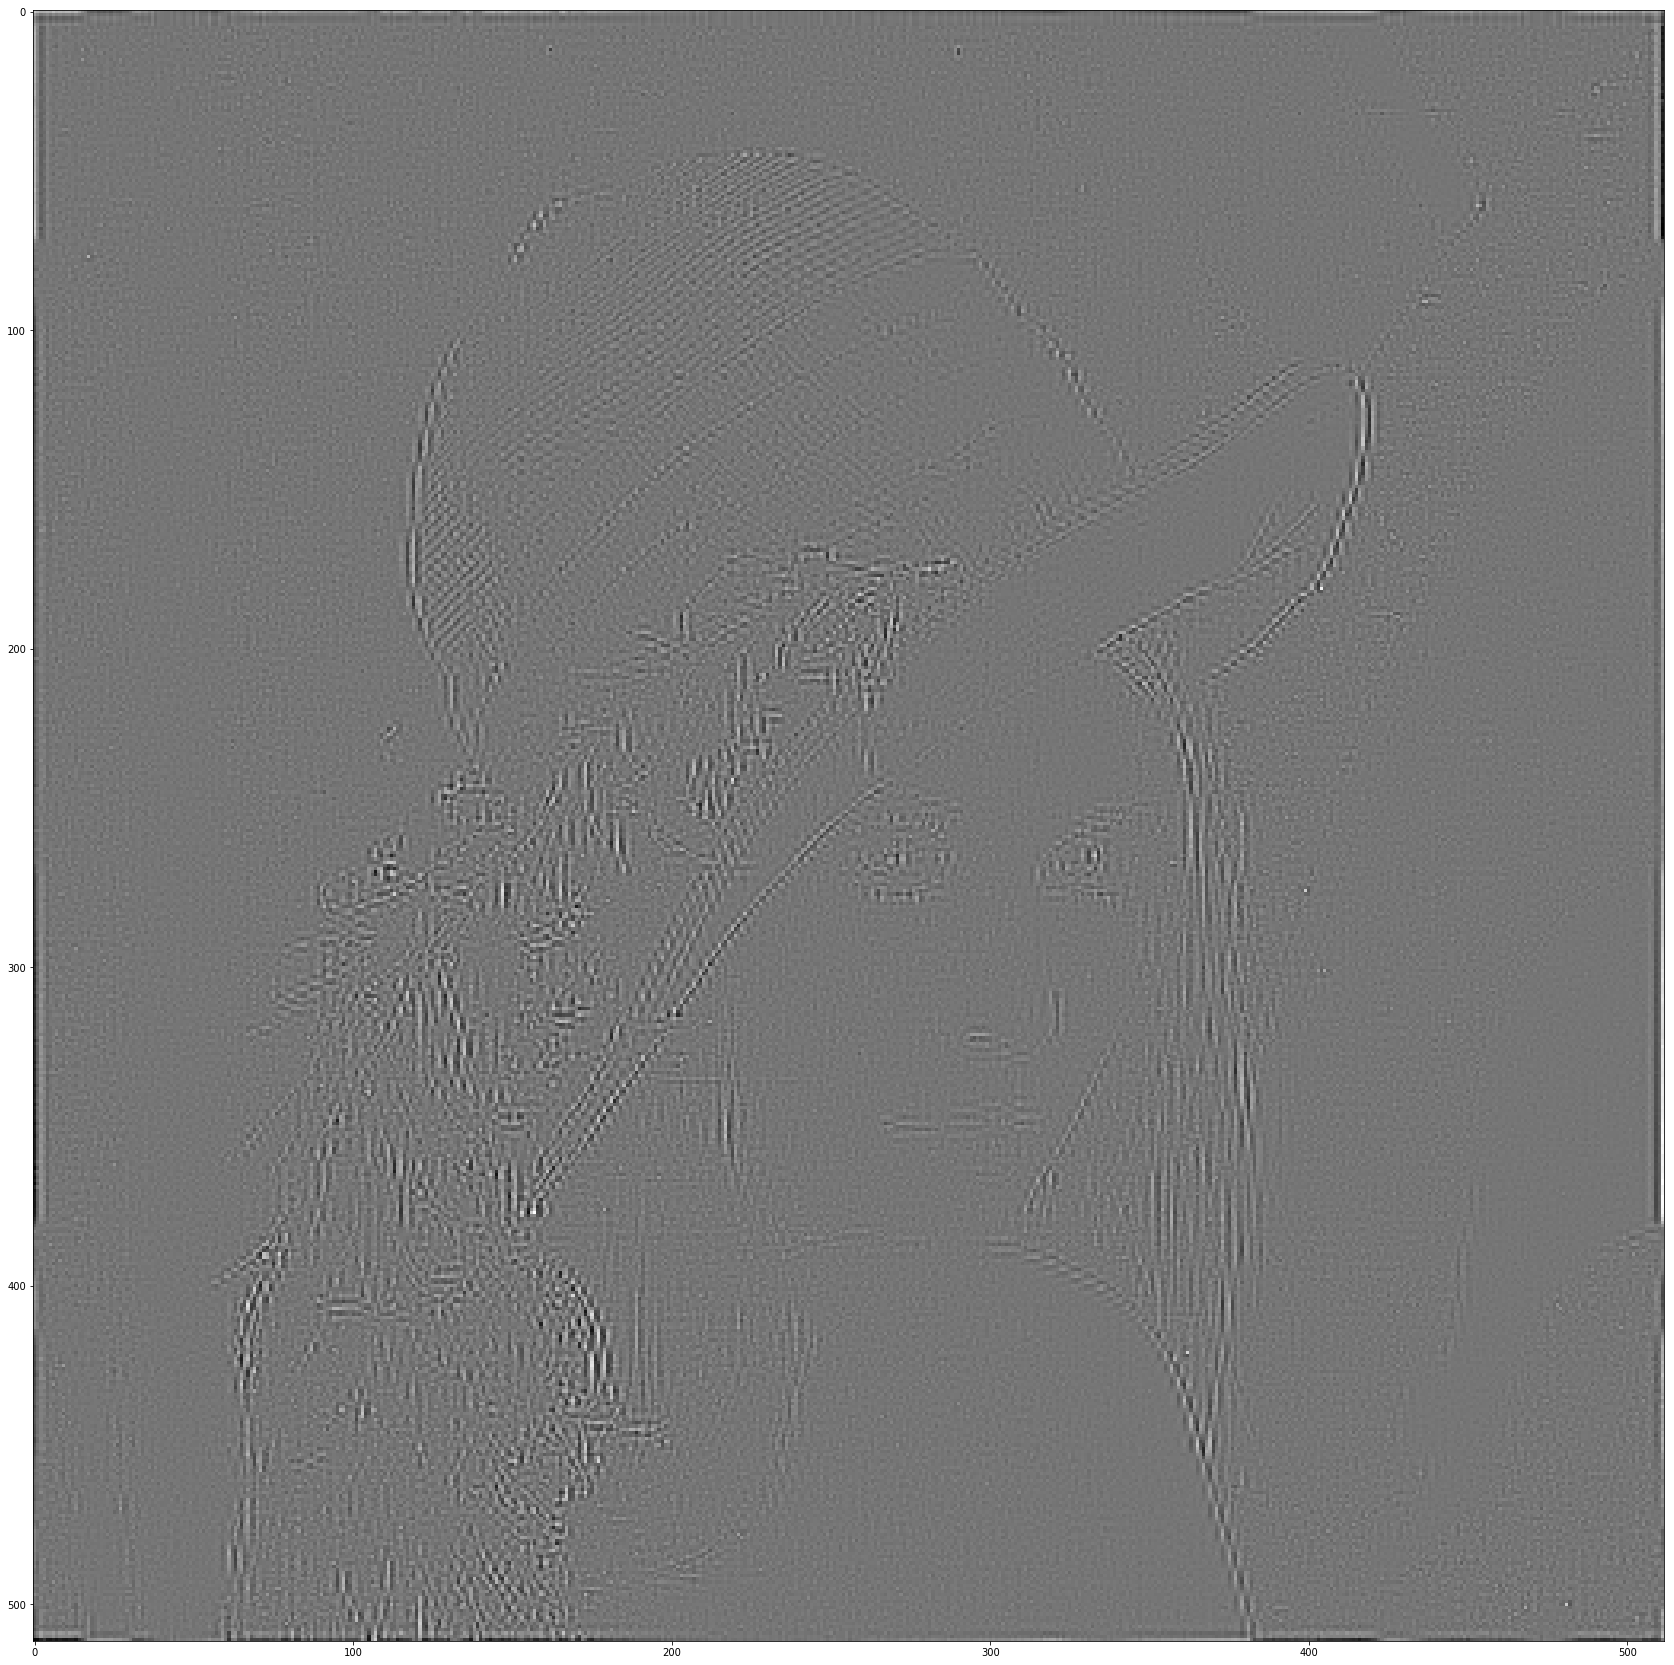

In [12]:
# Objective
L, H = pywt.dwt2(Y, wavelet, 'per')
zero = np.zeros((L.shape[0], L.shape[1]))
_H_ = pywt.idwt2((zero, H), wavelet, 'per')
show(_H_)

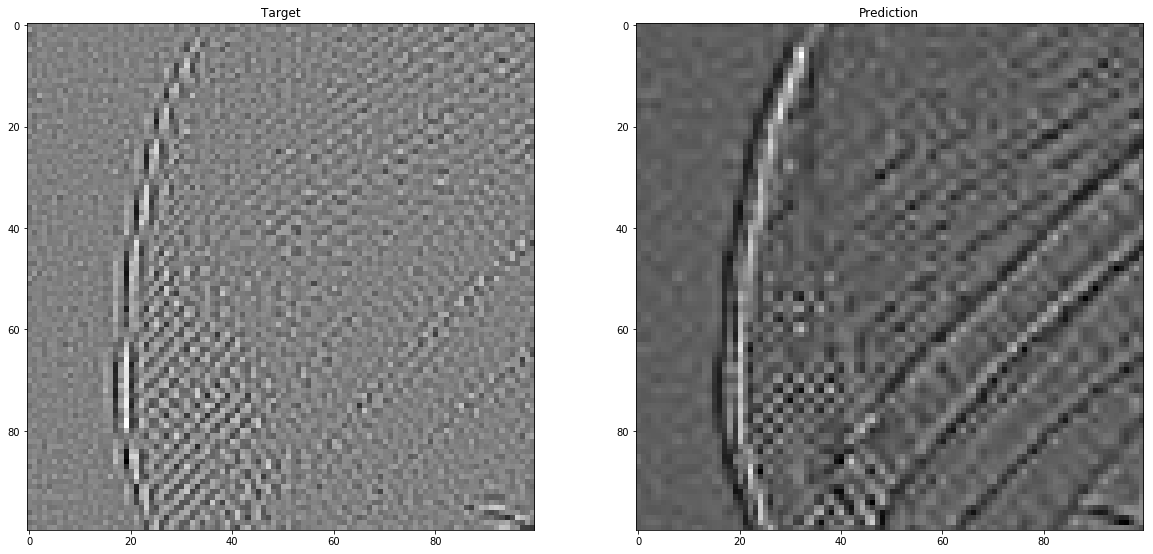

In [13]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

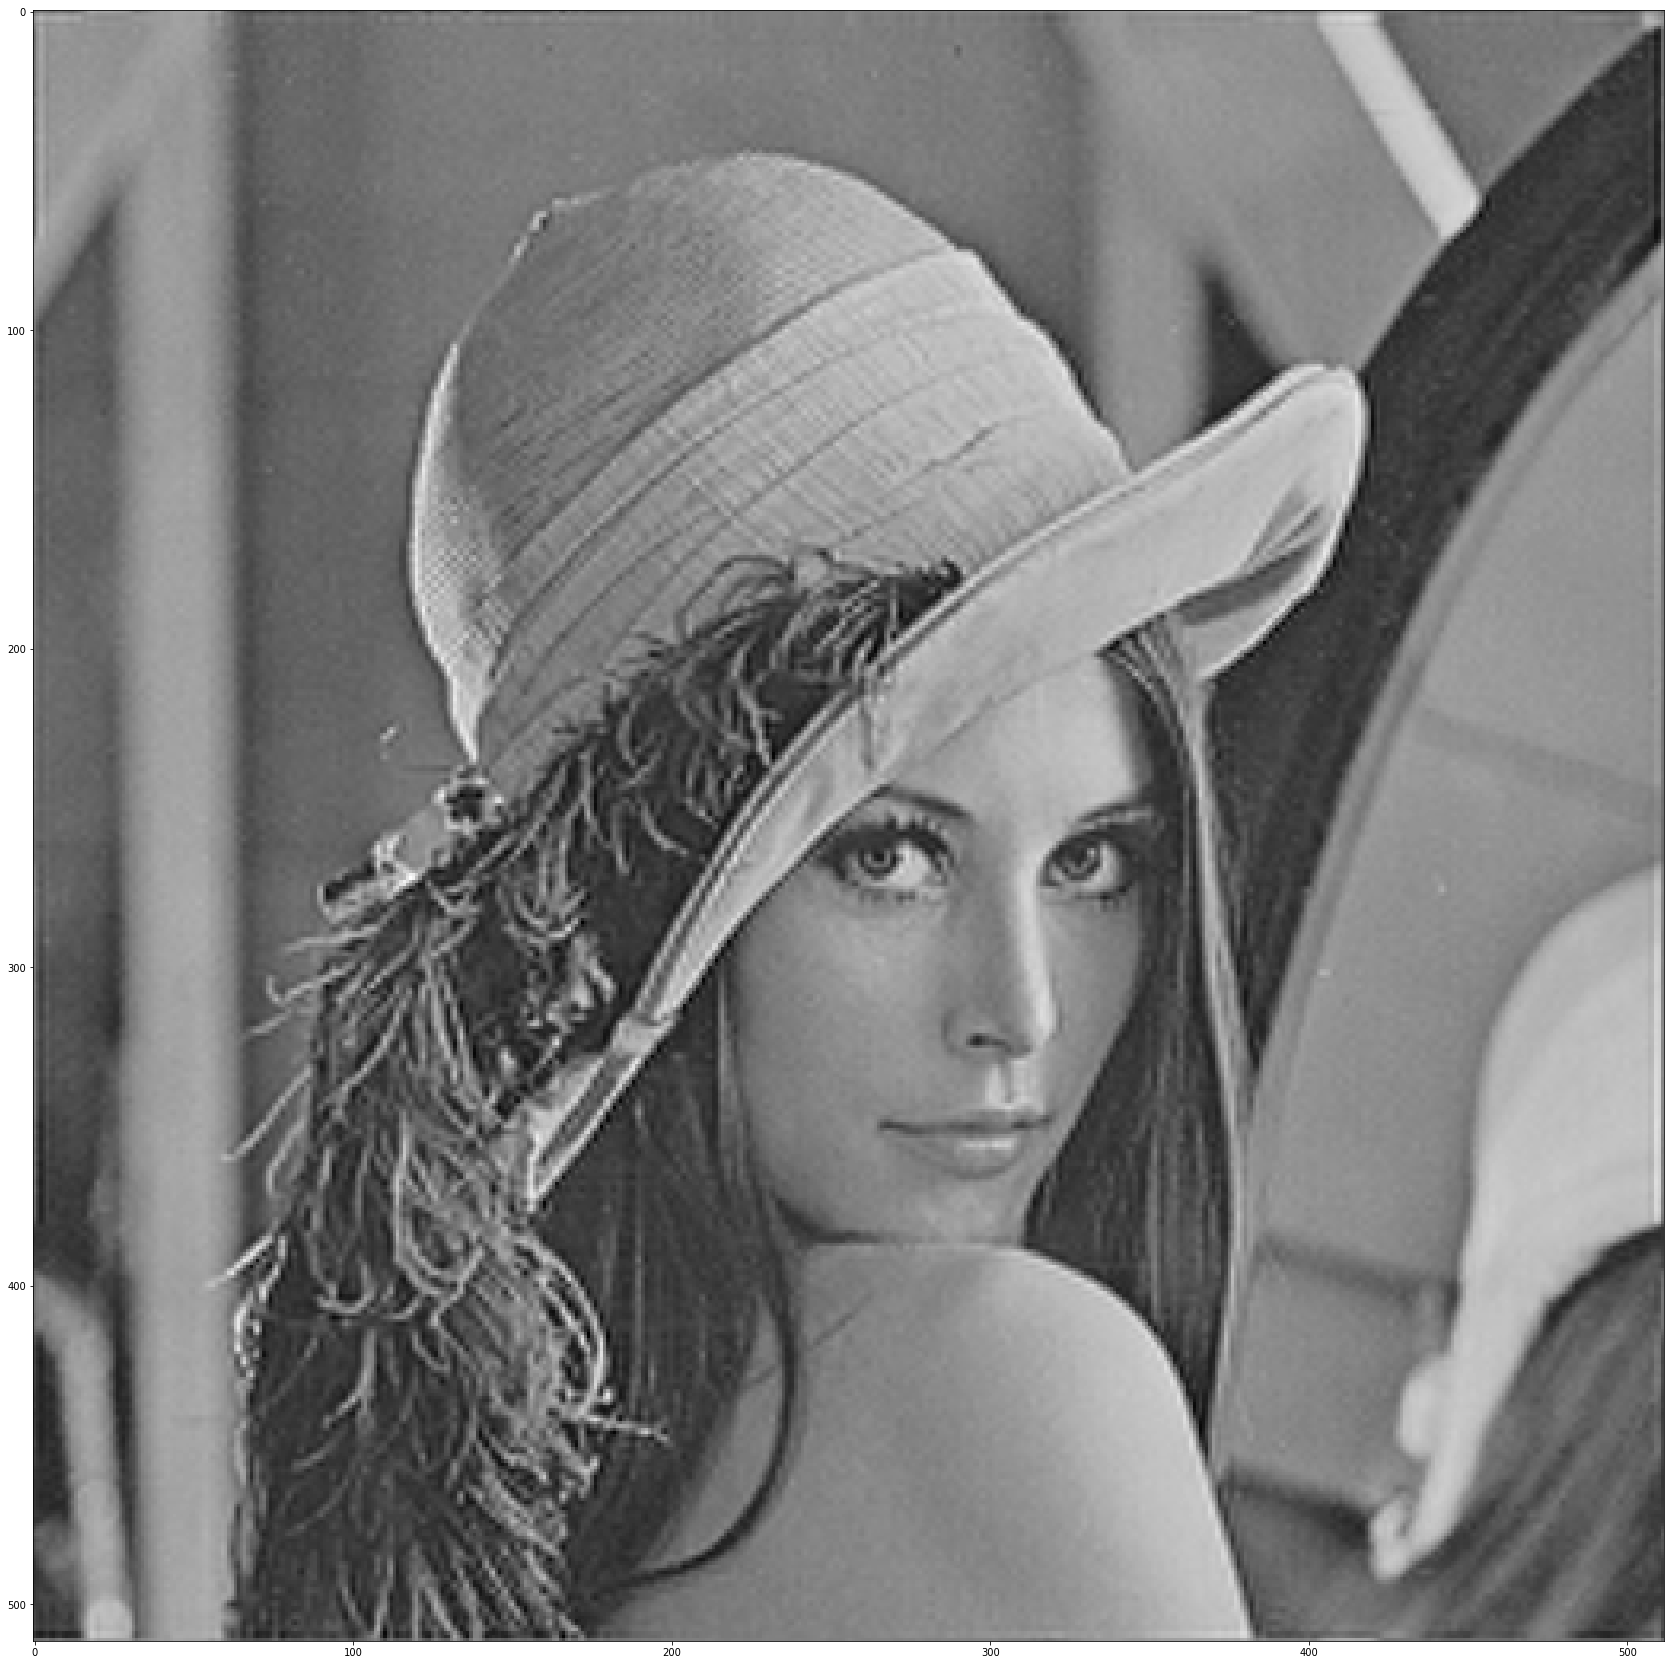

In [14]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)

In [ ]:
tmp = L_big

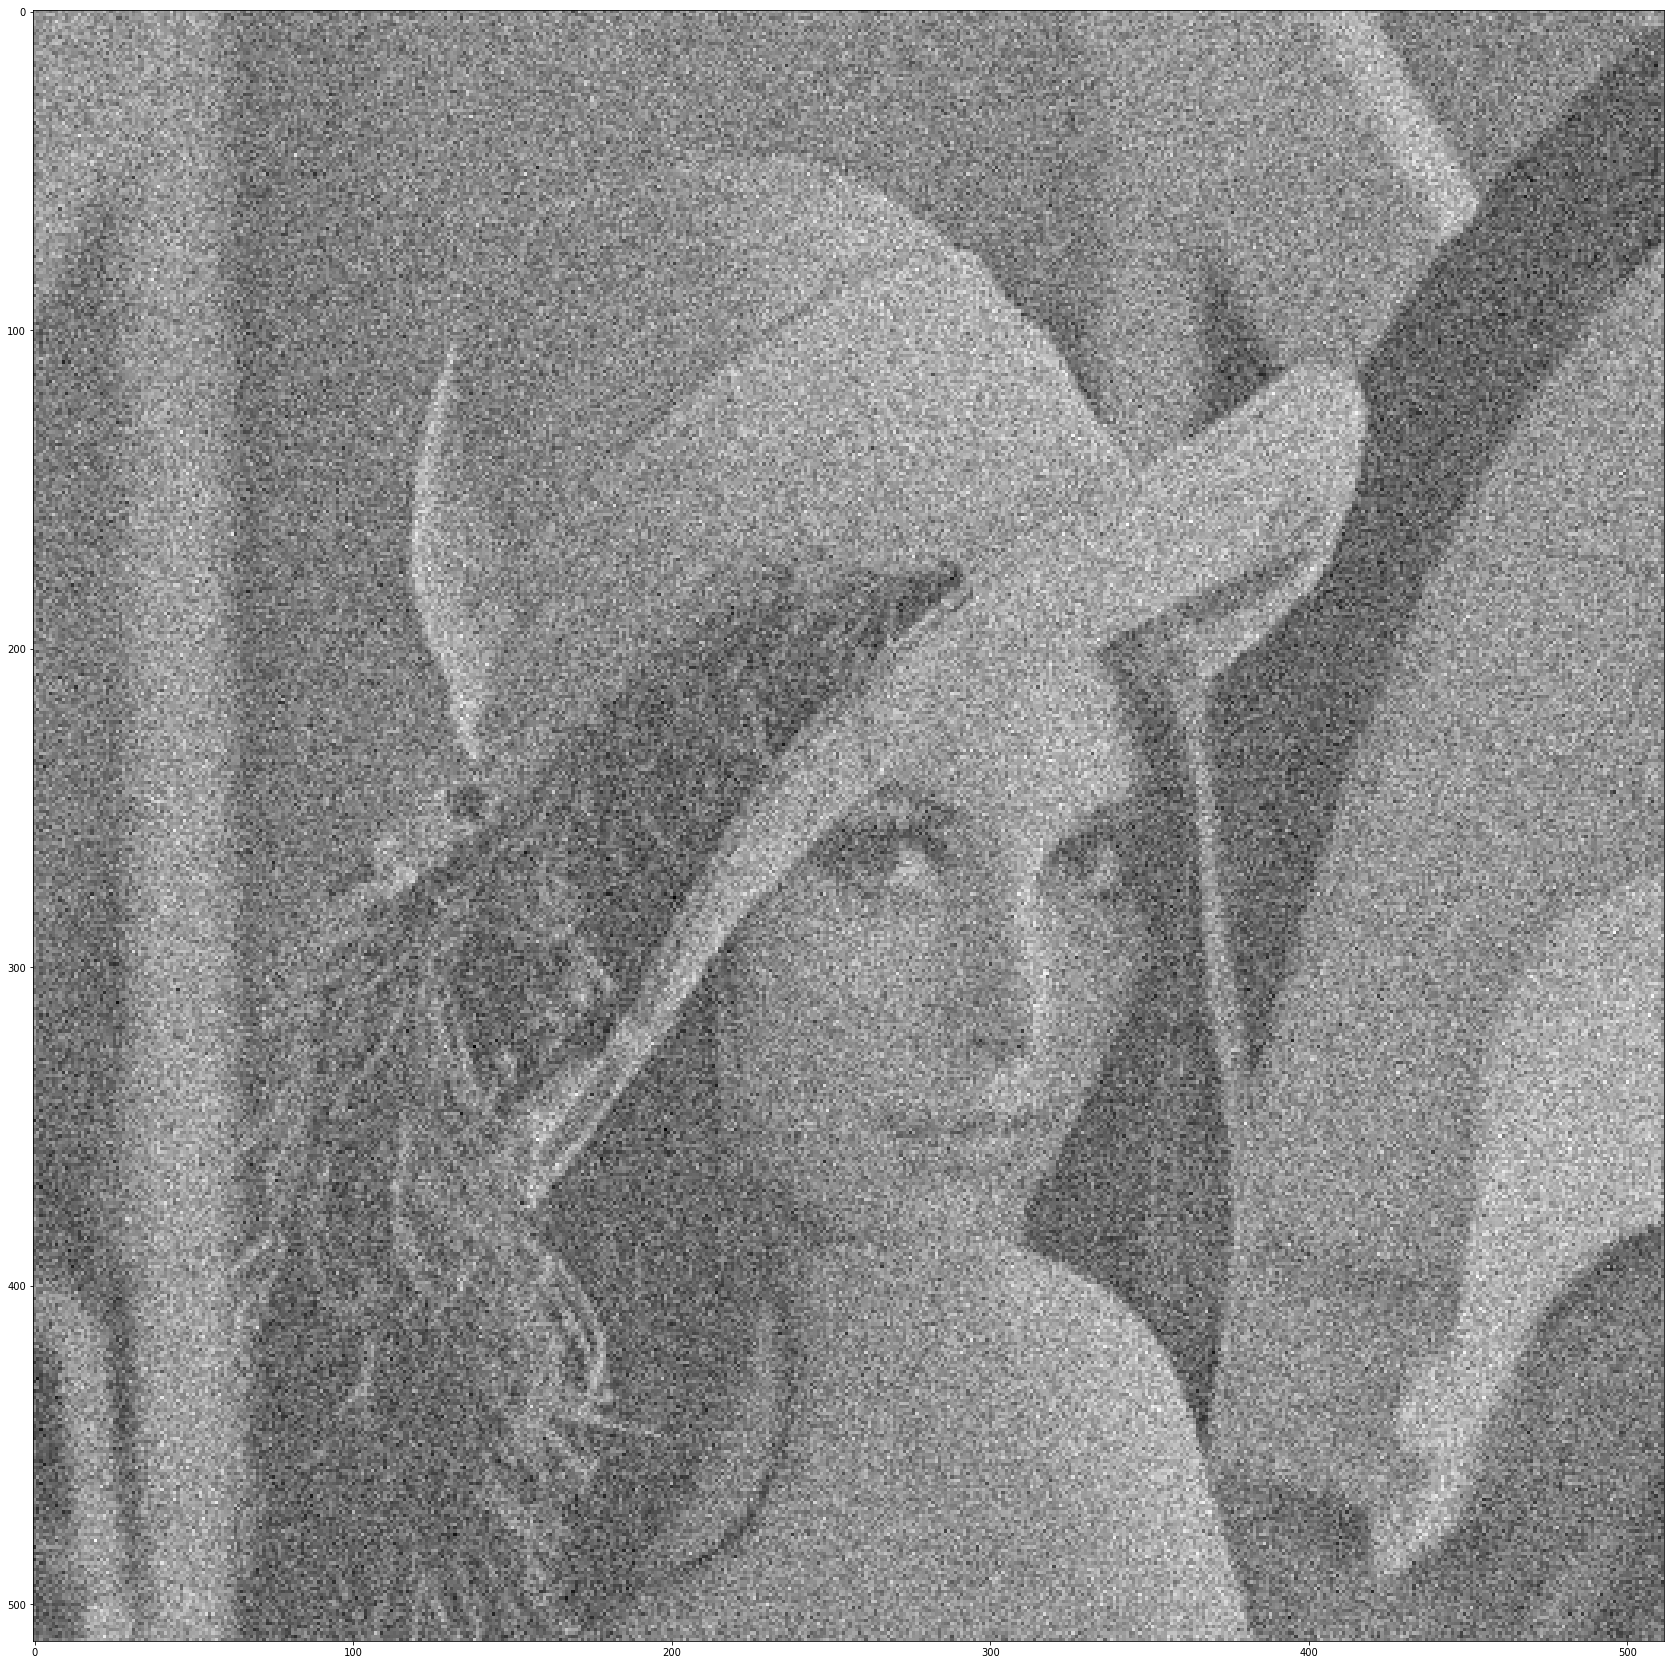

In [43]:
tmp = tmp + np.random.normal(0,1,L_big.shape)
show(tmp)

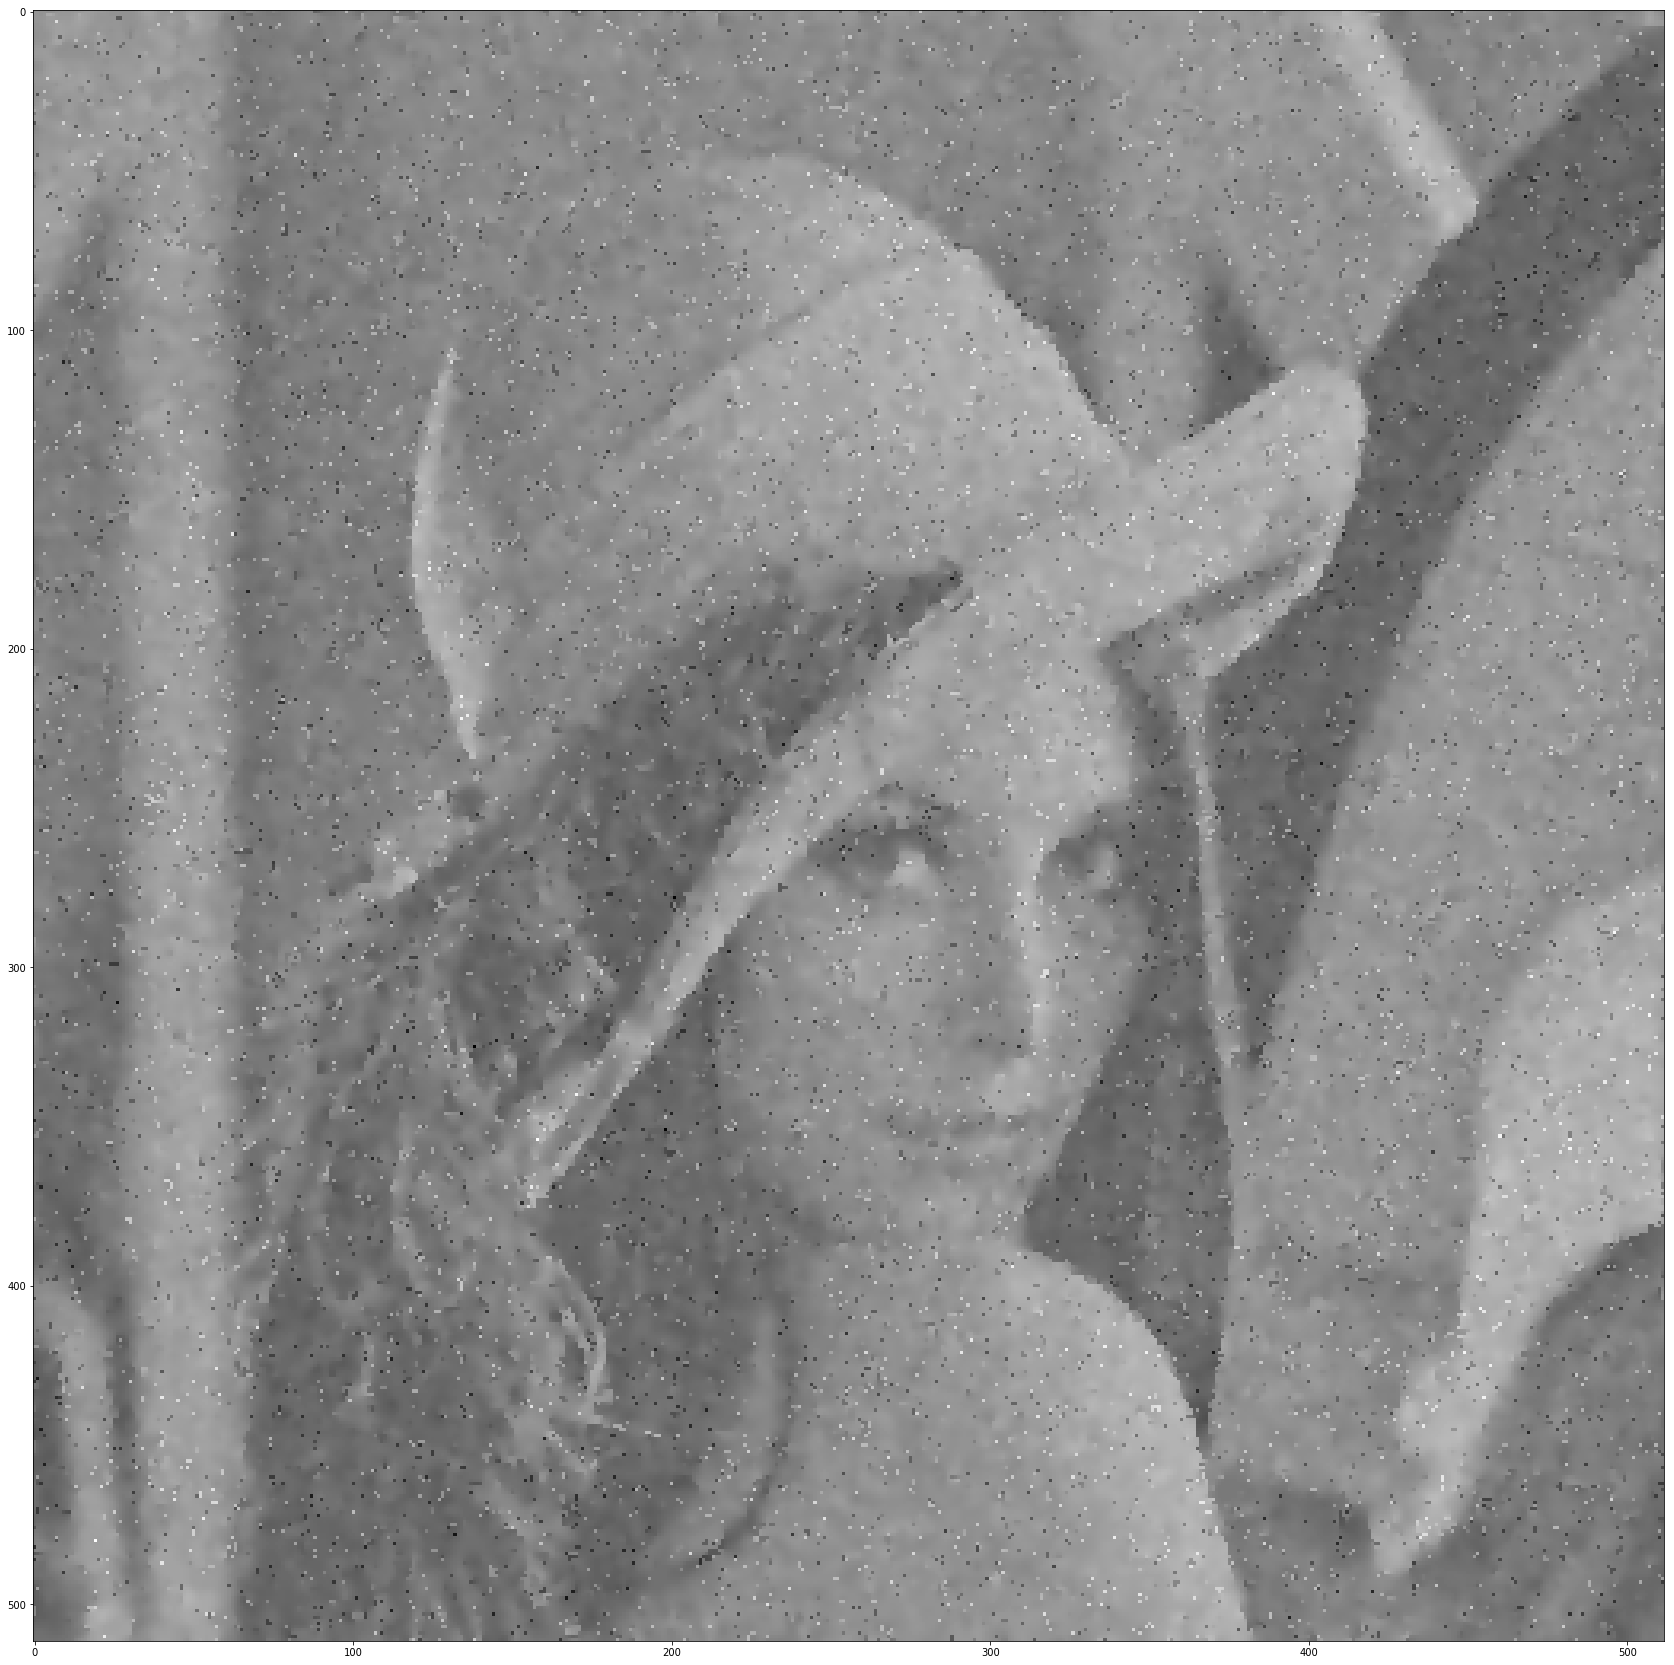

In [42]:
L_big_filtered = anisotropic_diffusion(tmp, niter=5)
show(L_big_filtered)

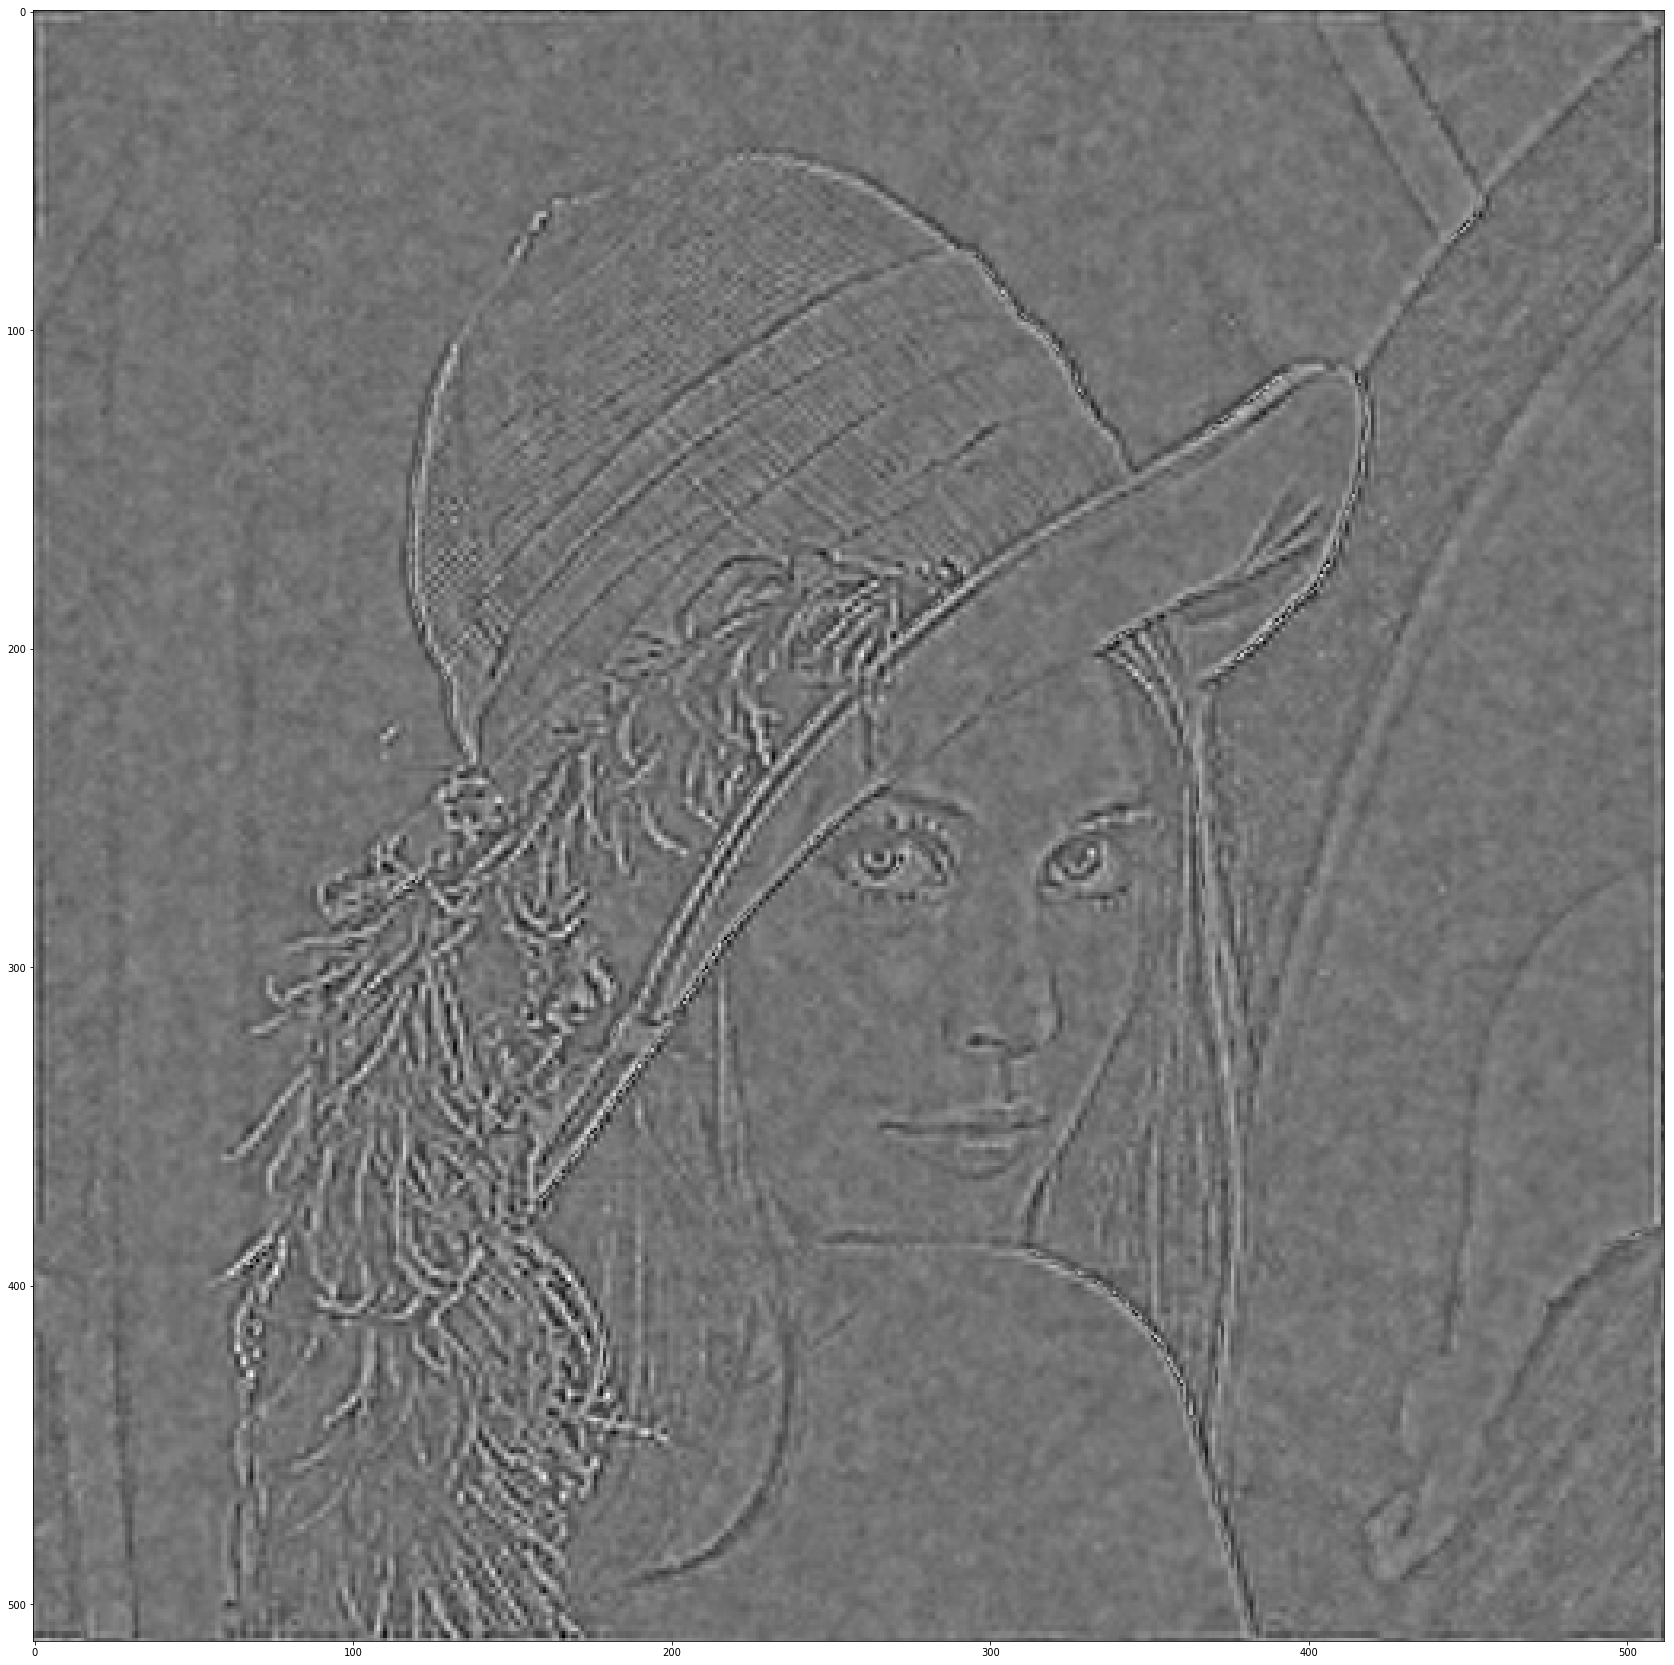

In [37]:
diff = L_big - L_big_filtered
show(diff)

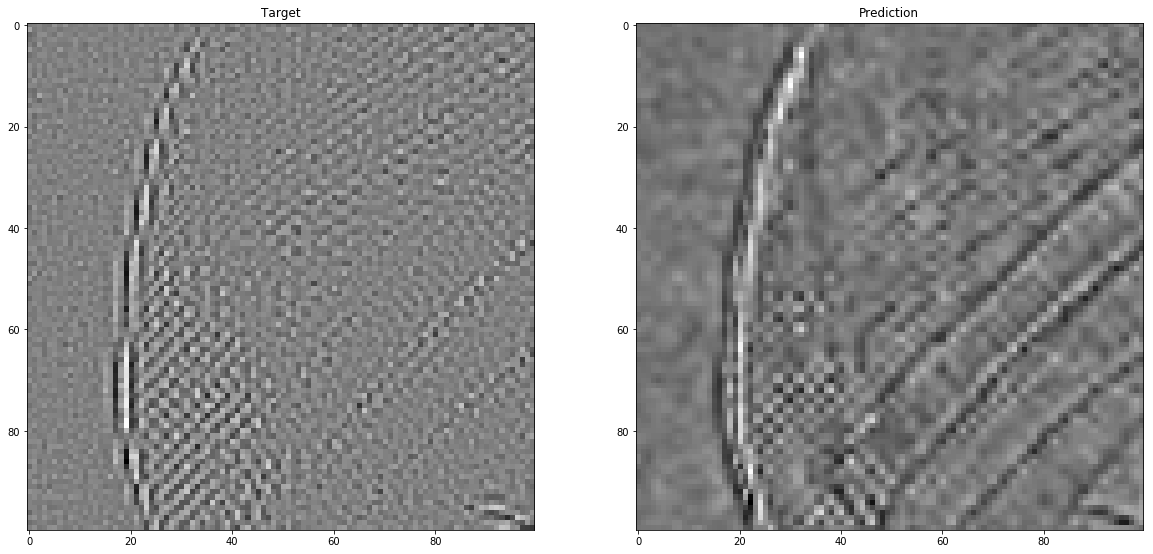

In [38]:
f, (ax0, ax1) = plt.subplots(1, 2, figsize=(20,20))
ax0.imshow(_H_[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax0.imshow(image, cmap='gray')
ax0.set_title('Target')
ax1.imshow(diff[100:200, 100:200], cmap='gray', interpolation='nearest')
#ax1.imshow(filled, cmap='gray')
ax1.set_title('Prediction')
plt.show()

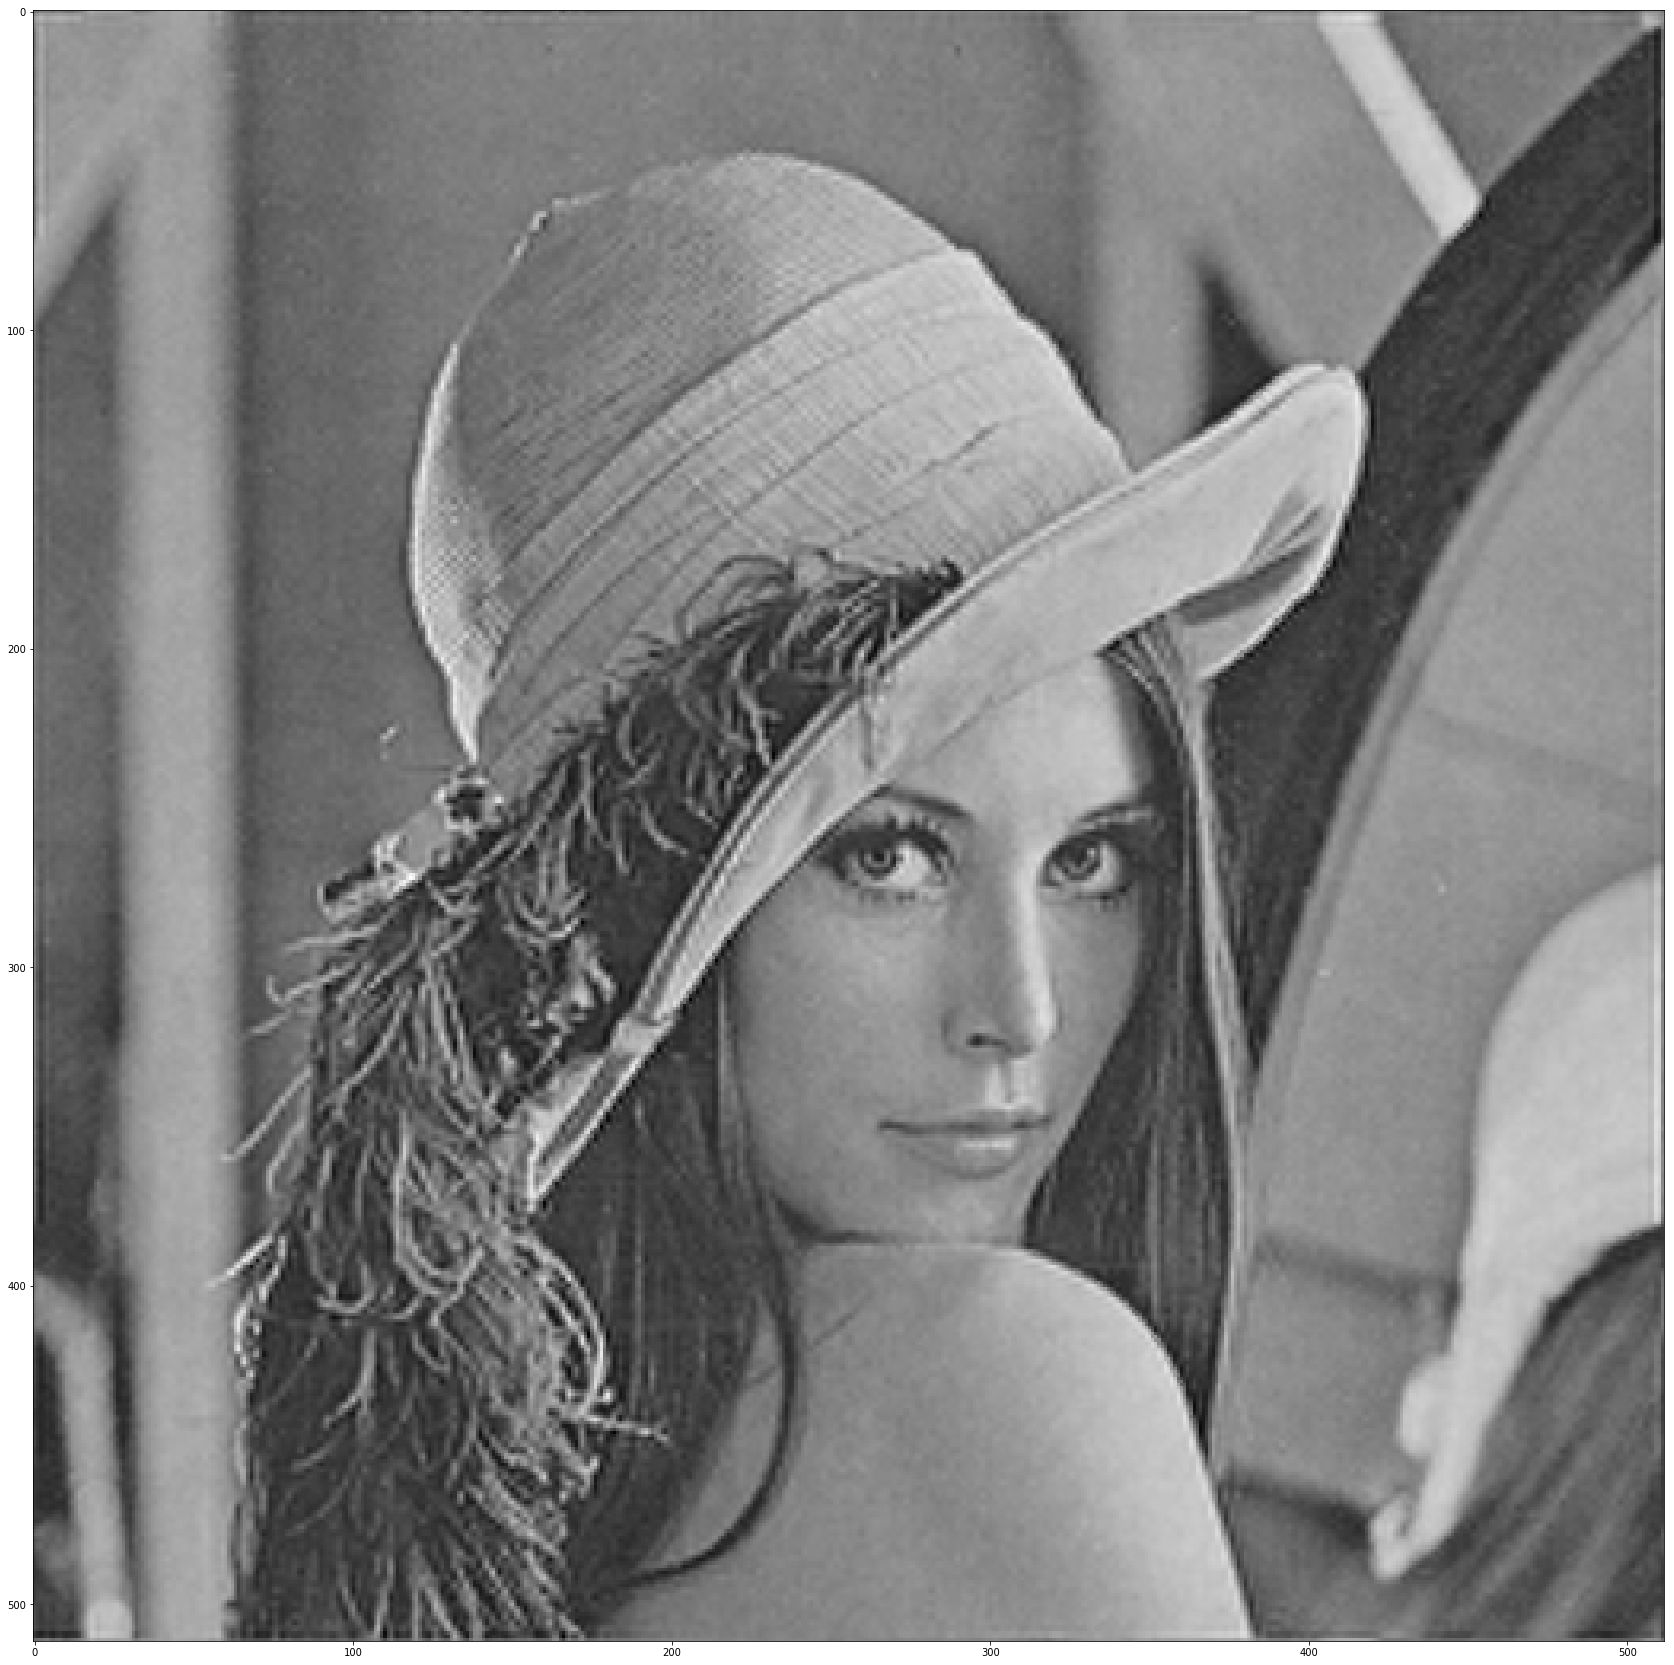

In [39]:
reconstruction_without_H = (L_big + diff)/2
show(reconstruction_without_H)